# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s): Syed Abdullah Hassan, Andrea Heigl

Student number(s): 2411987, 2405304

## Description

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. **Each file consists one exercise type performed by single user.** Data are divided on multiple folders. Note that, **in each folder there is one long sequence of single exercise**, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br>
 Read raw data from the files. Prepare and **divide each data file to shorter sequences using windowing method**. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, **producing several example sequences from one exercise file for classification purposes**. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. **Each window** will consists **500x3 matrix of acceleration data** and **5x192 matrix of depth image data**.

</div>

In [48]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Enter data folder location
# loc = "/Users/andreaheigl/Multi-Modal-Physical-Exercise-Classification/MEx"
loc = "/Users/abdullah/Desktop/studies/MMDF/project/Multi-Modal-Physical-Exercise-Classification/MEx"
print(loc)

/Users/abdullah/Desktop/studies/MMDF/project/Multi-Modal-Physical-Exercise-Classification/MEx


In [49]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)

    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df

    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head(10))
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,03,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,03,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...
2,03,06,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,03,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,03,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
5,03,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
6,03,05,1,act,acc,time acc_0 acc_1 acc_2 0 ...
7,03,07,1,act,acc,time acc_0 acc_1 acc_2 0 ...
8,04,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
9,04,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312


In [50]:
# check acceleration data

# filter just the rows with sensor 'acc'
acc_rows = df_records[df_records["sensor"] == "acc"].iloc[0]
display(df_records[df_records["sensor"] == "acc"]["df"].iloc[0]) # shows the part of df_records in which the sensor data is acc ( thigh and wrist accelerometer sensor)


# show the first 5 rows of the df
print("Erste Zeile mit 'acc':")
display(acc_rows["df"])

,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312
...,...,...,...,...
7951,79510.0,-0.754687,0.504687,-0.359375
7952,79520.0,-0.760938,0.510938,-0.359375
7953,79530.0,-0.754687,0.504687,-0.359375
7954,79540.0,-0.765625,0.510938,-0.359375


Erste Zeile mit 'acc':


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312
...,...,...,...,...
7951,79510.0,-0.754687,0.504687,-0.359375
7952,79520.0,-0.760938,0.510938,-0.359375
7953,79530.0,-0.754687,0.504687,-0.359375
7954,79540.0,-0.765625,0.510938,-0.359375


In the code block above, we seperated the readings that were with the accelerometer in the variable callled acc_rows so that we can easily use the acc values.

In [51]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""

# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.

for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())

    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue

        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()

        records_windowed.append(tmp_data)

df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,03,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,03,02,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,03,02,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,03,02,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,03,02,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312


In the code snippet below, we are trying to understand the two types of data and are visualizing them both seperately. 

It is important to understand the data. And how exactly was it collected. 

So just to make it easier to understand. When we say Acc we mean accelerometer sensor data from the sensor that was attached to the thigh and wrist. 

When we mention dc, we mean show five depth camera data frames within 2 seconds



## Table 1: Exercises

| Exercise Name               | Starting Position                                                                 | Action                                                                                                                                                                                                 |
|-----------------------------|-----------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Knee-rolling**            | Lying on back, knees together and bent, feet flat on floor                        | Slowly roll knees to the right, back to the centre, then to the left, keeping upper trunk still.                                                                                                       |
| **Bridging**                | Lying on back with knees bent and slightly apart, feet flat on floor and arms by side | Squeeze buttock muscles and lift hips off floor. Hold approximately 5-seconds and lower slowly.                                                                                                       |
| **Pelvic tilt**             | Lying on back with knees bent and slightly apart, feet flat on floor and arms by side | Tighten stomach muscles and press small of back against the floor, letting your bottom rise. Hold approximately 5 seconds then relax.                                                                  |
| **The Clam**                | Lying on right side with hips and shoulders in straight line. Bend knees so thighs are at 90 degrees angle. Rest head on top arm (stretched overhead or bent depending on comfort). Bend top arm and place hand on floor for stability. Stack hips directly on top of each other (same for shoulders). | Keep big toes together and slowly rotate leg in hip socket so the top knee opens. Open knee as far as you can without disturbing alignment of hips. Slowly return to starting position.                 |
| **Repeated Extension in Lying** | Lying face down, place palms on floor and elbows under shoulders (press-up position) | Straighten elbows as far as you can and push top half of body up as far as you can. Pelvis, hips and legs must stay relaxed. Maintain position for approximately 2-seconds then slowly lower to starting position. |
| **Prone punches**           | On all 4s with hands directly beneath shoulders, knees slightly apart and straight back. | Punch right arm in front and lower to floor. Repeat with left arm. Keep trunk as still as possible.                                                                                                    |
| **Superman**                | On all 4s with hands directly beneath shoulders, knees slightly apart and straight back. | Extend right arm straight in front of you and left leg straight behind you, keeping trunk as still as possible. Hold approximately 5-seconds then lower and repeat with other arm and leg.              |


This table has been taken from MEx: Multi-modal Exercises Dataset for Human Activity Recognition Research paper


Using this table, we were able to better understand what exactly is happening in each of the excercises. 

In [52]:
display(df_records_windowed[df_records_windowed["sensor"] == "dc"]["df"].iloc[0]) # shows the part of df_records_windowed in which the sensor data is dc (Depth Camera)
display(df_records_windowed[df_records_windowed["sensor"] == "acc"]["df"].iloc[0]) # shows the part of df_records_windowed in which the sensor data is acc ( thigh and wrist accelerometer sensor)

print("SHAPE DC:",df_records_windowed[df_records_windowed["sensor"] == "dc"]["df"].iloc[0].shape)
print("SHAPE ACC:",df_records_windowed[df_records_windowed["sensor"] == "acc"]["df"].iloc[0].shape)



,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4589,0.9178,0.9257,0.921,0.921,0.9178,0.9149,0.9139,0.9116,...,0.9578,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
1,1000.0,0.4605,0.9194,0.9249,0.921,0.921,0.9178,0.9139,0.9133,0.9122,...,0.9578,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
2,2000.0,0.4605,0.9178,0.9249,0.921,0.921,0.9178,0.9139,0.9133,0.9116,...,0.9570,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
3,3000.0,0.4589,0.9176,0.9241,0.921,0.921,0.9178,0.9139,0.9139,0.9116,...,0.9586,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
4,4000.0,0.4605,0.9186,0.9249,0.921,0.921,0.9178,0.9139,0.9122,0.9122,...,0.9586,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312
...,...,...,...,...
495,4950.0,-0.500000,0.796875,-0.234375
496,4960.0,-0.500000,0.796875,-0.234375
497,4970.0,-0.500000,0.812500,-0.234375
498,4980.0,-0.500000,0.796875,-0.234375


SHAPE DC: (5, 193)
SHAPE ACC: (500, 4)


<a id='task1'></a>
<div class=" alert alert-warning">
     
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>

</div>

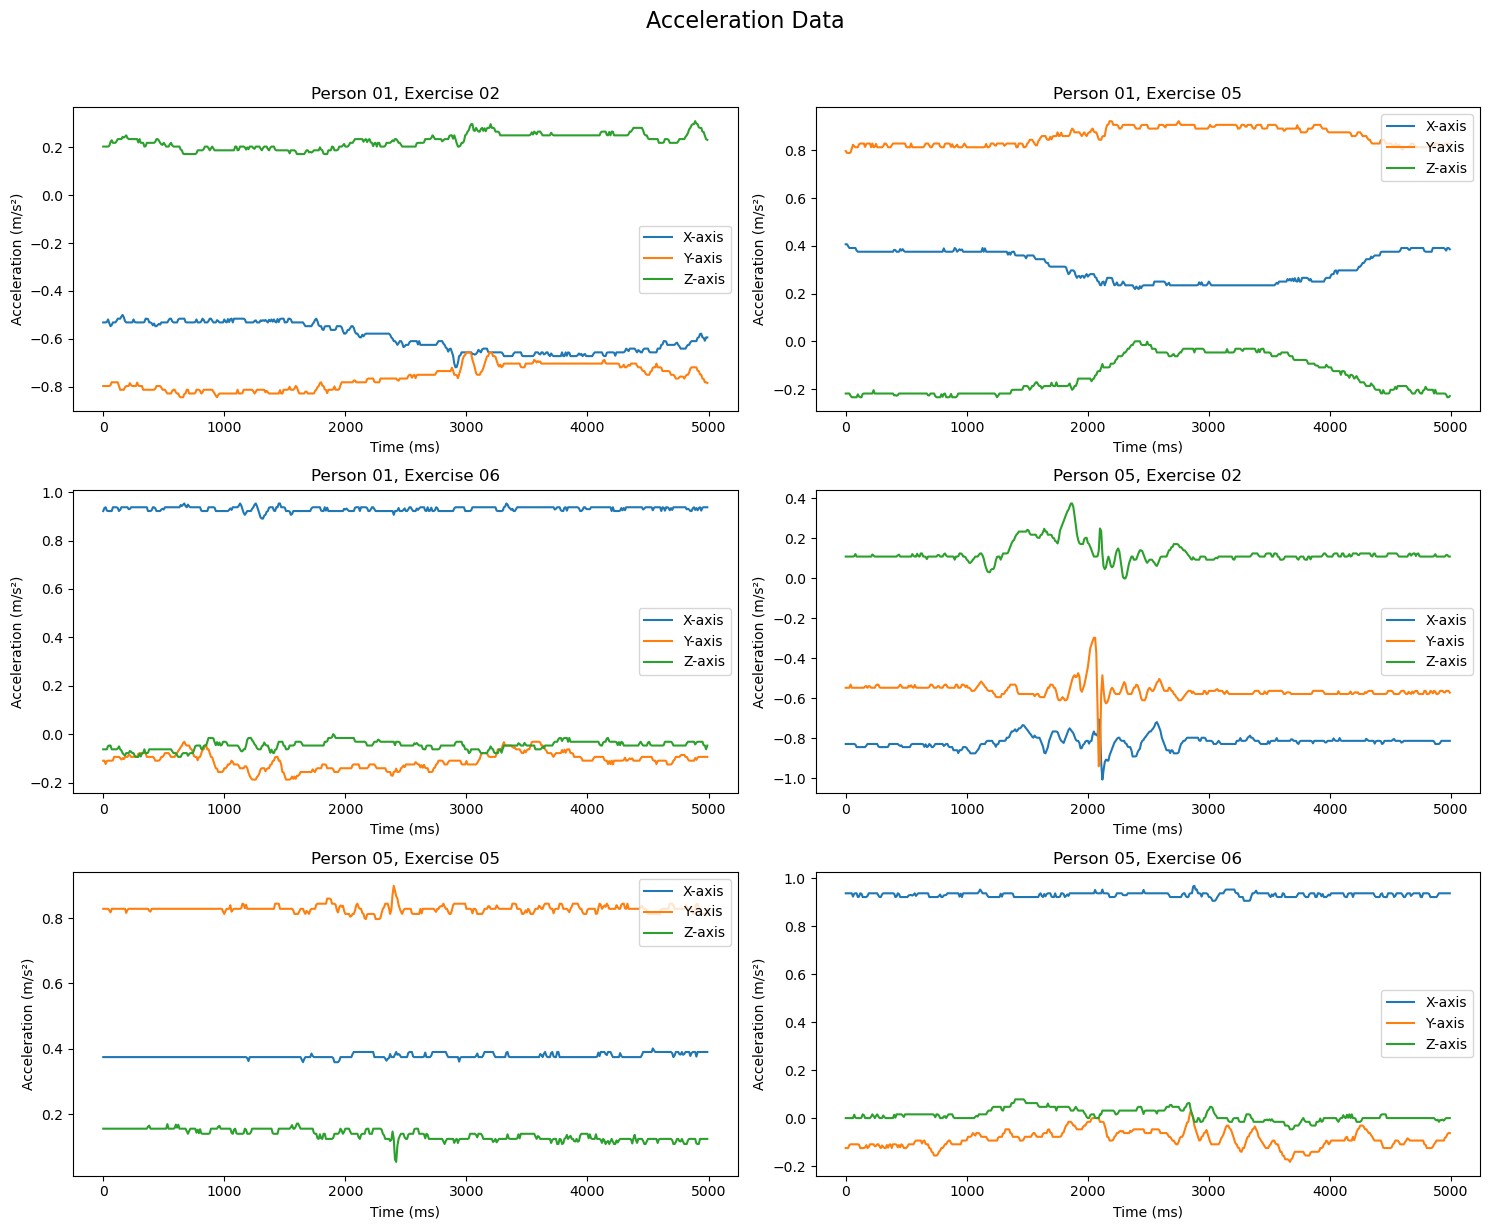

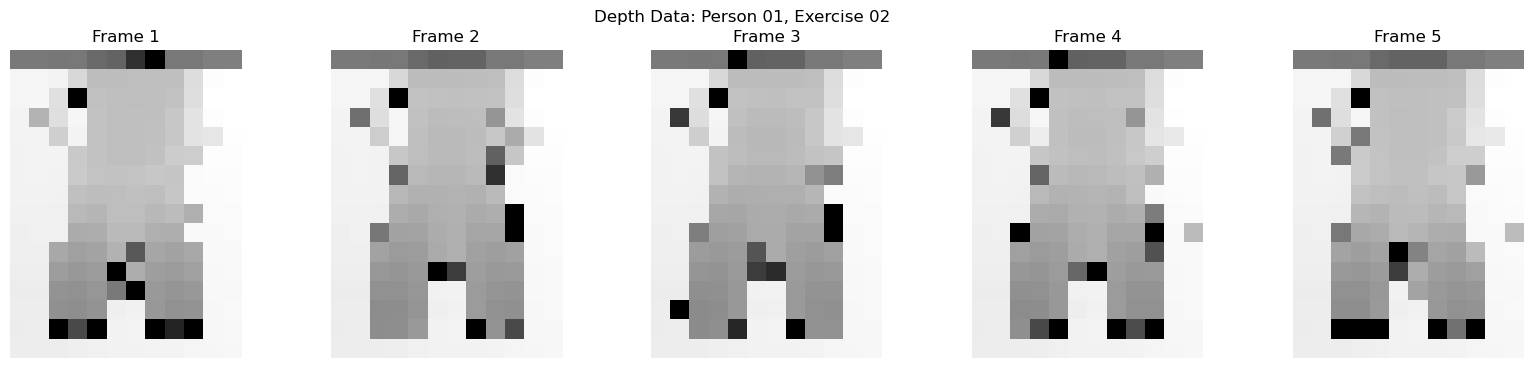

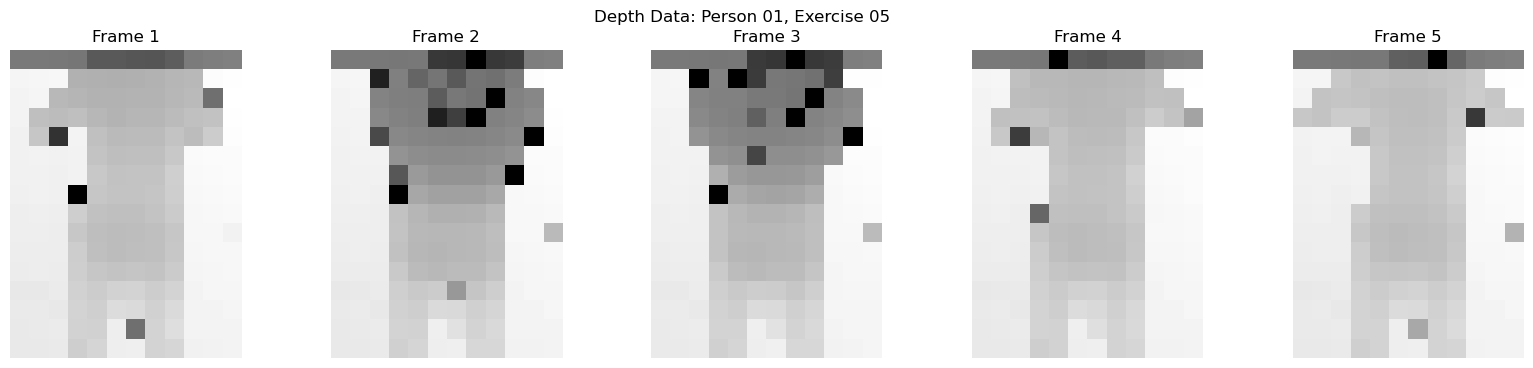

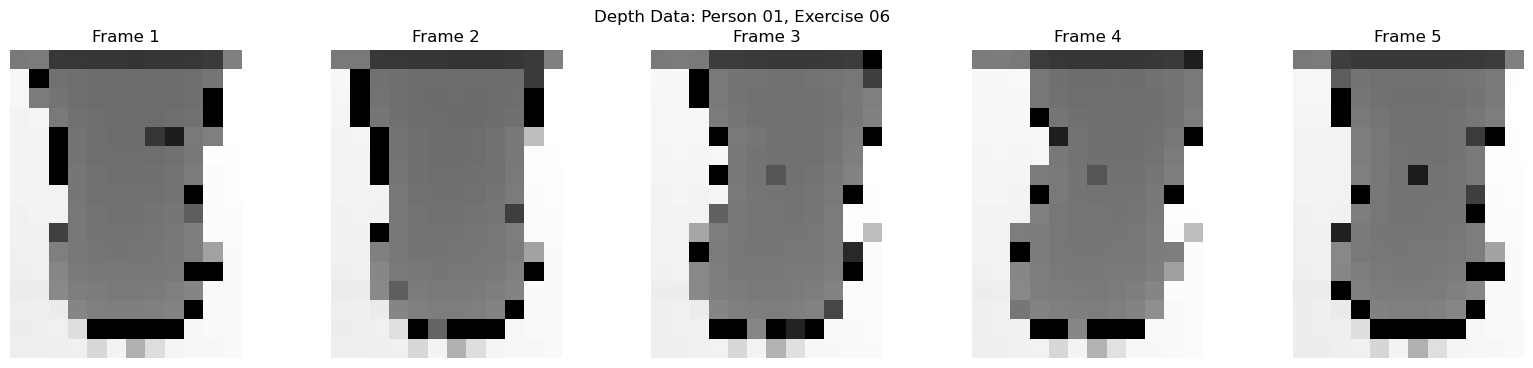

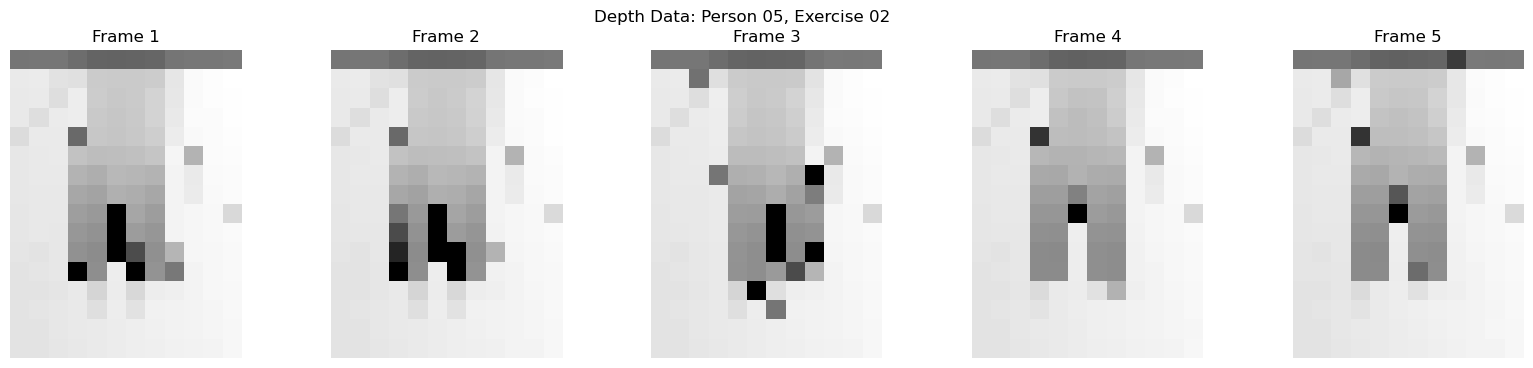

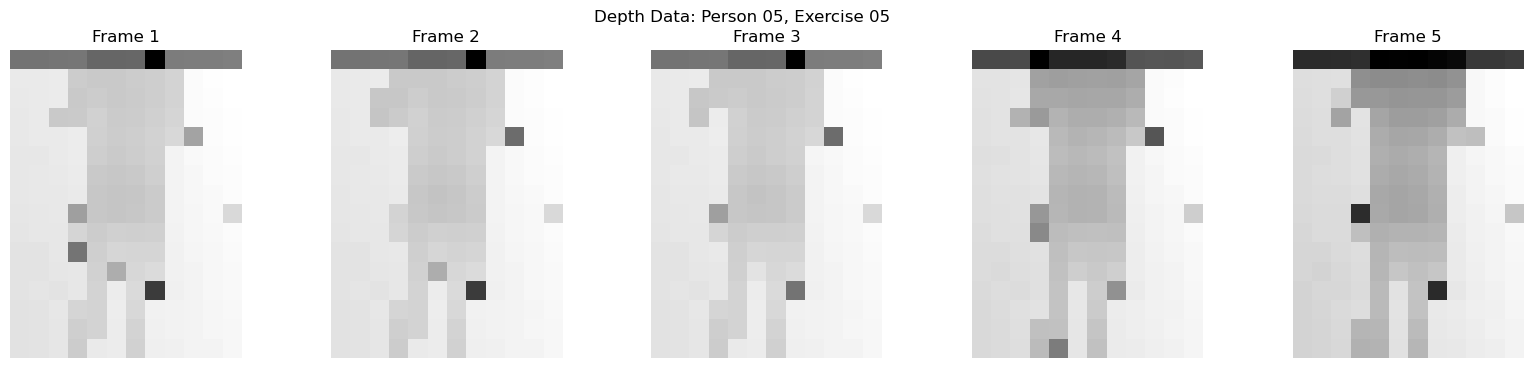

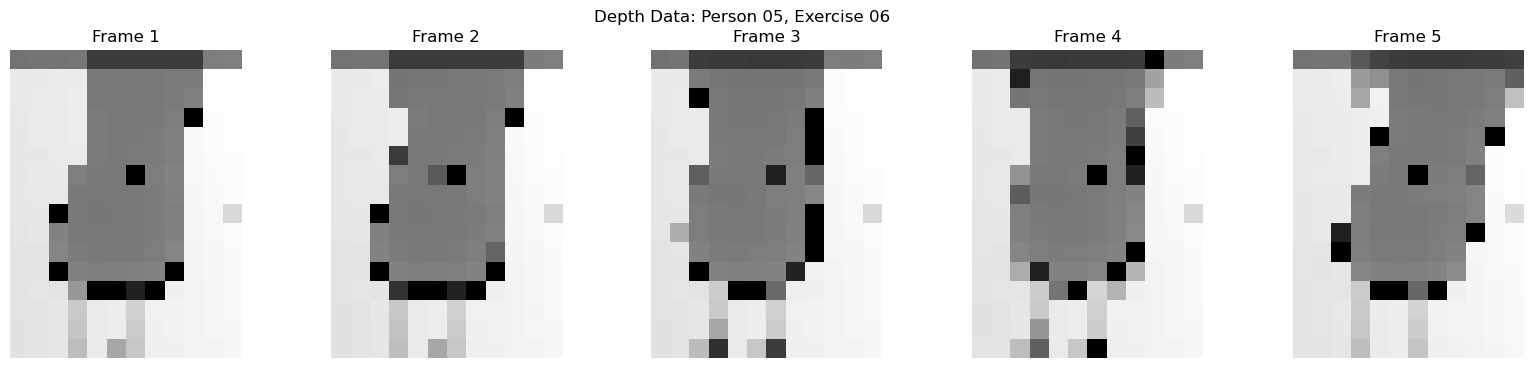

In [53]:
import matplotlib.pyplot as plt

# Select persons and exercises
persons = ["01", "05"]
exercises = ["02", "05", "06"]

# Initialize lists to store acceleration and depth data for all combinations
accel_plots = []
depth_plots = []

# Filter the relevant data from the DataFrame
for person in persons:
    for exercise in exercises:
        # Filter for person, exercise, and the first window
        filtered_data = df_records_windowed[
            (df_records_windowed["subject_id"] == person) &
            (df_records_windowed["exercise_id"] == exercise) &
            (df_records_windowed["window_idx"] == 0)
        ]

        if filtered_data.empty:
            print(f"No data found for Person {person}, Exercise {exercise}")
            continue

        # Retrieve data
        accel_data = filtered_data[filtered_data["sensor"] == "acc"]["df"].iloc[0] # Filtered data for acceleration and Depth Camera
        depth_data = filtered_data[filtered_data["sensor"] == "dc"]["df"].iloc[0]

        # Store acceleration data for later plotting
        accel_plots.append((person, exercise, accel_data))

        # Store depth data for later plotting
        depth_values = depth_data.iloc[:, 1:].to_numpy()  # All columns except "time"
        depth_plots.append((person, exercise, depth_values))

# Plot
num_accel_plots = len(accel_plots)
rows = (num_accel_plots + 1) // 2  # calc rows 
fig, axes = plt.subplots(rows, 2, figsize=(15, 4 * rows))  
fig.suptitle("Acceleration Data", fontsize=16, y=1.02)  

# Flatten axes if there's only one row
if rows == 1:
    axes = axes.reshape(1, -1)

# Plot  acceleration graph 
for idx, (person, exercise, accel_data) in enumerate(accel_plots):
    row = idx // 2  #  row index
    col = idx % 2   #  column index
    ax = axes[row, col]  #  subplot

    ax.plot(accel_data["time"], accel_data["acc_0"], label="X-axis")
    ax.plot(accel_data["time"], accel_data["acc_1"], label="Y-axis")
    ax.plot(accel_data["time"], accel_data["acc_2"], label="Z-axis")
    ax.set_title(f"Person {person}, Exercise {exercise}")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Acceleration (m/s²)")
    ax.legend()


plt.tight_layout()
plt.show()

# Plot all depth data graphs together
for person, exercise, depth_values in depth_plots:
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, ax in enumerate(axes):
        if i >= depth_values.shape[0]:  # Ensure enough rows are available
            break
        depth_frame = depth_values[i, :].reshape(12, 16).T  # Reshape to 16x12
        ax.imshow(depth_frame, cmap="gray")
        ax.axis("off")
        ax.set_title(f"Frame {i+1}")
    plt.suptitle(f"Depth Data: Person {person}, Exercise {exercise}")
    plt.show()

<a id='task1'></a>
<div class=" alert alert-warning">

<b>1.2</b>
Split the prepared dataset to **training and testing datasets** so that data of **persons 1-7 are used for training** and data of **persons 8-10 are used for testing**. In next tasks, training dataset could be **further divided on (multiple) validation data folds** to tune the models parameters, when needed.<br>
    
Note: **Training set should have 1486 windows** and **testing set should have 598 windows**. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.
  
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In this part we were able to filter and get the same data frame size for the 2 sensor data values, the difficult part was to align and make sure that the window_idx, subject, &exercise are same for the two readings. So we came up with a function that turns these 3 keys and makes it into a unique id and uses that to align the data in both sides. This funtion was able to give us consistently aligned data on both sides.

Training Set Statistics:
Number of acceleration windows: 1486
Number of depth camera windows: 1486
Dimensions of acceleration data: (500, 4)
Dimensions of depth data: (5, 193)

Testing Set Statistics:
Number of acceleration windows: 598
Number of depth camera windows: 598
Dimensions of acceleration data: (500, 4)
Dimensions of depth data: (5, 193)
Visualizing Training Examples:
Training Example 1:


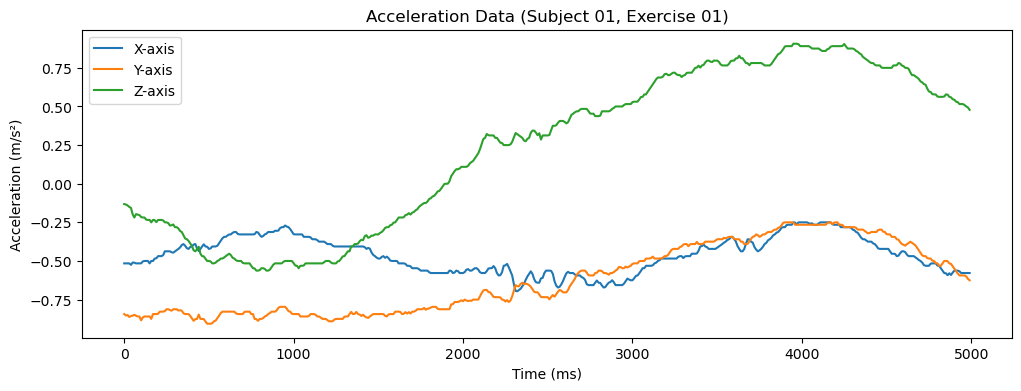

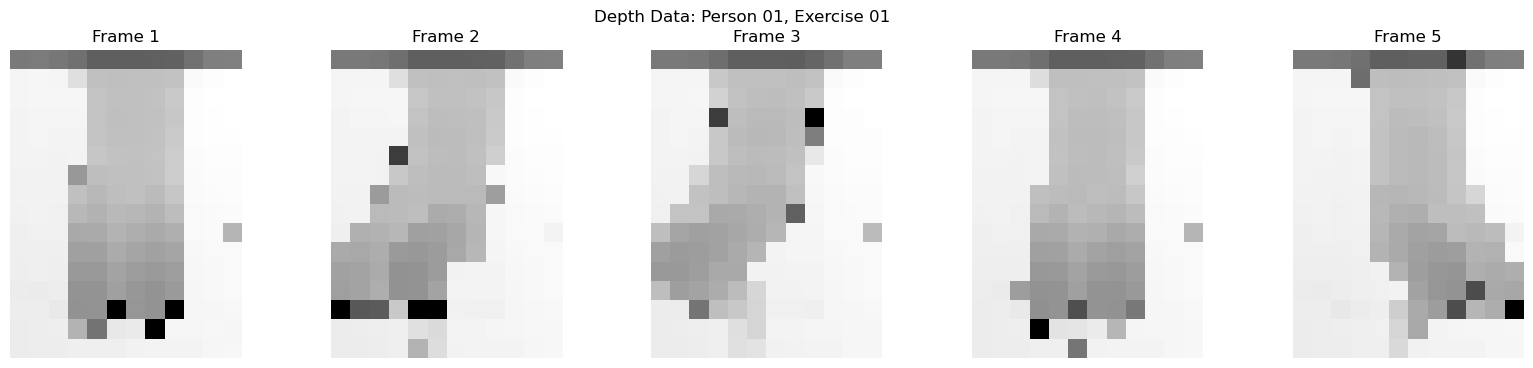

Training Example 2:


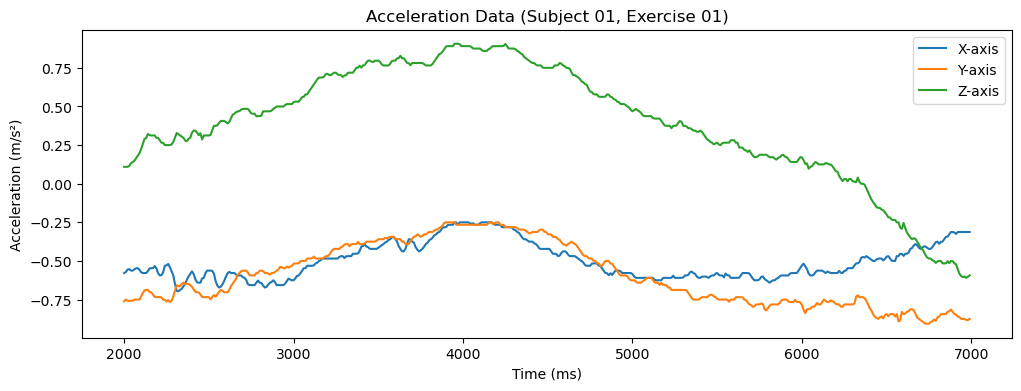

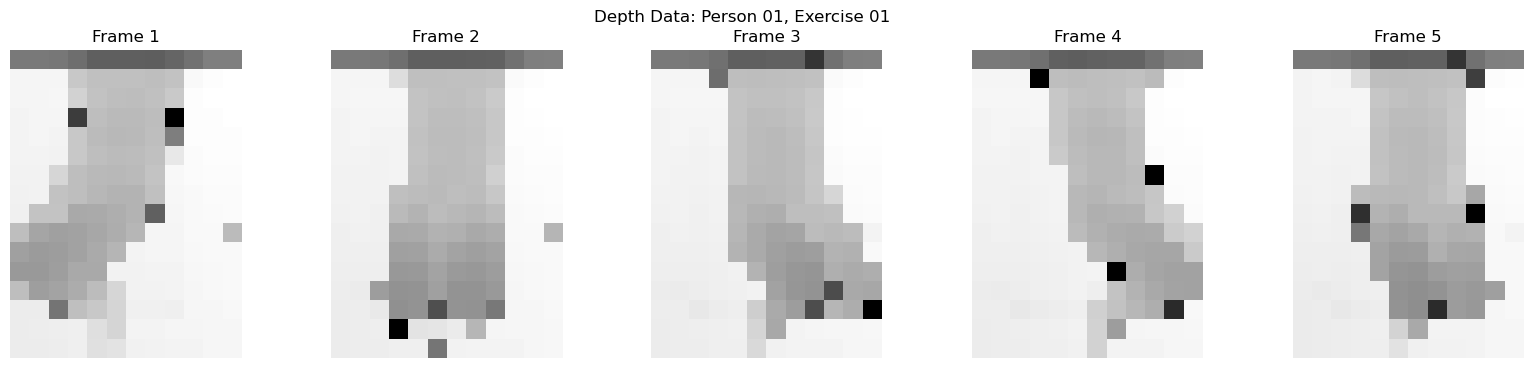

Training Example 3:


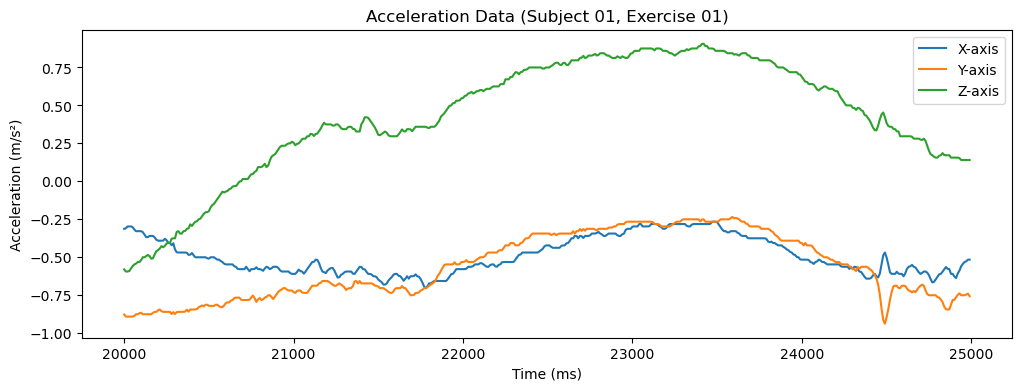

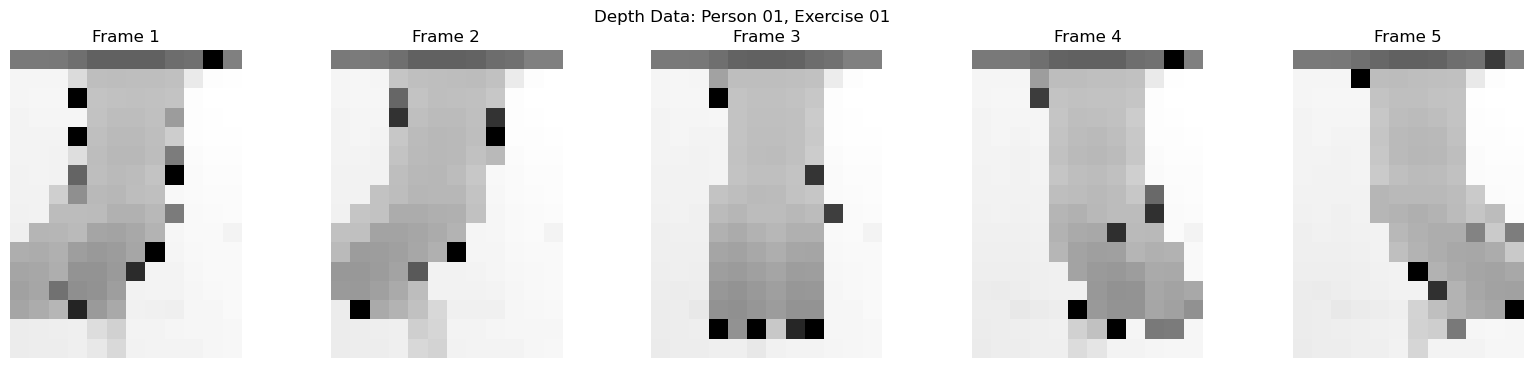

Training Example 4:


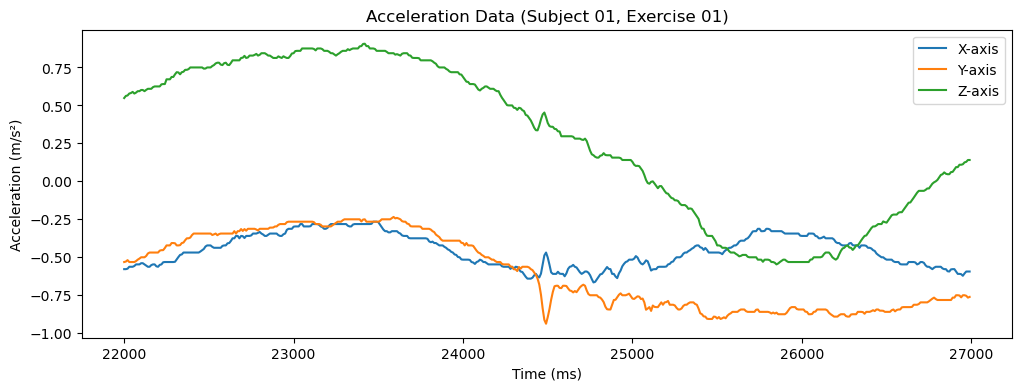

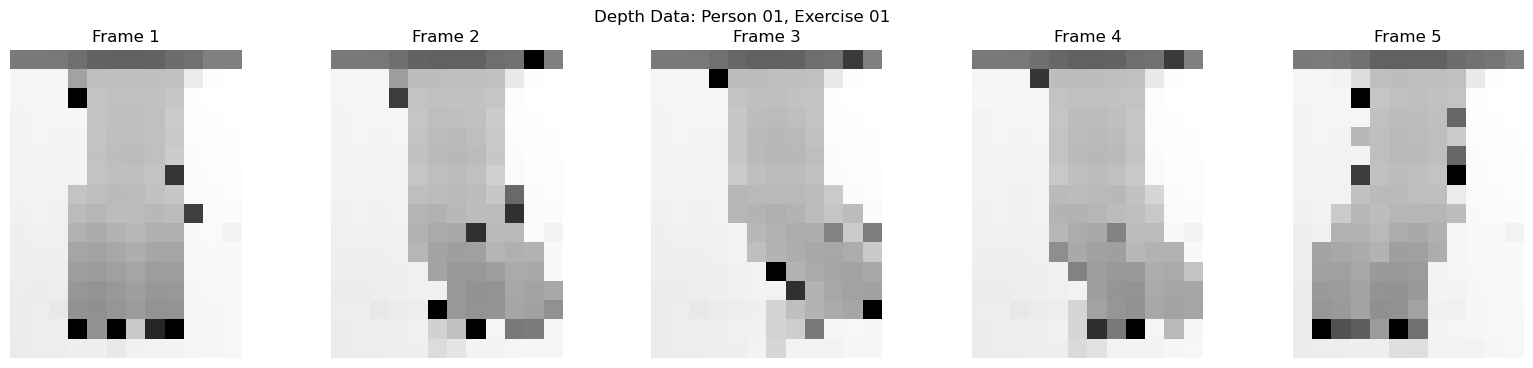

Training Example 5:


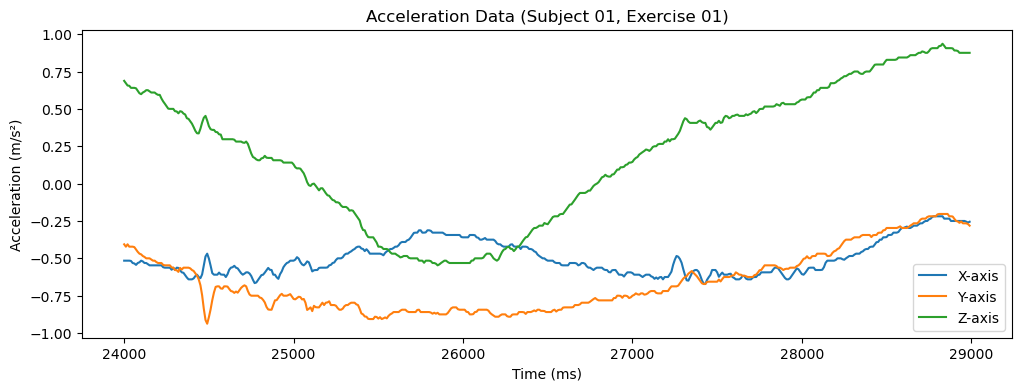

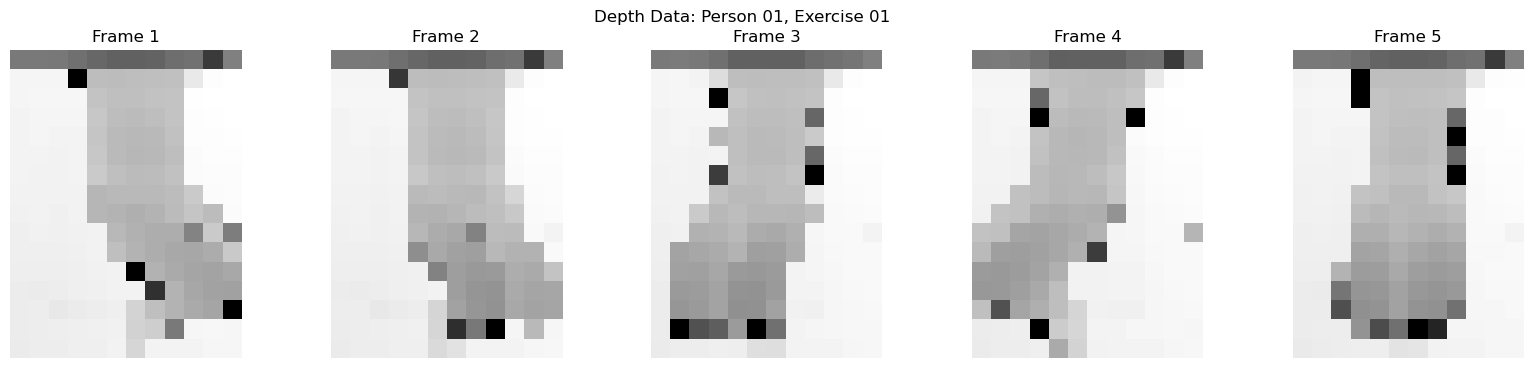


Visualizing Testing Examples:
Testing Example 1:


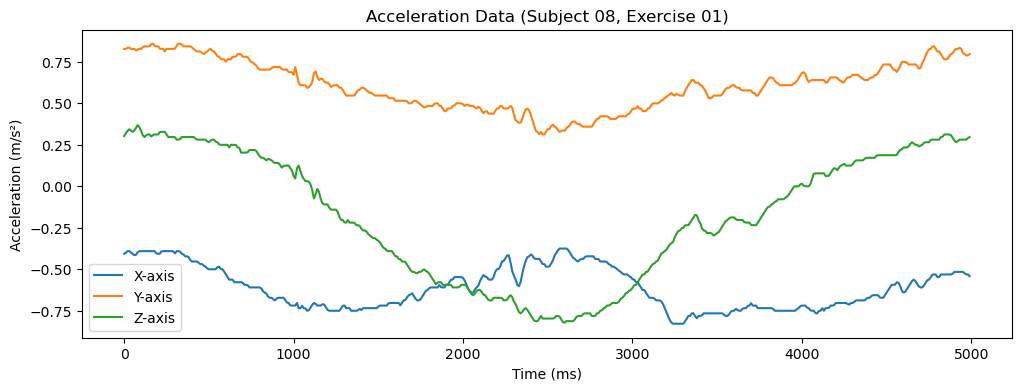

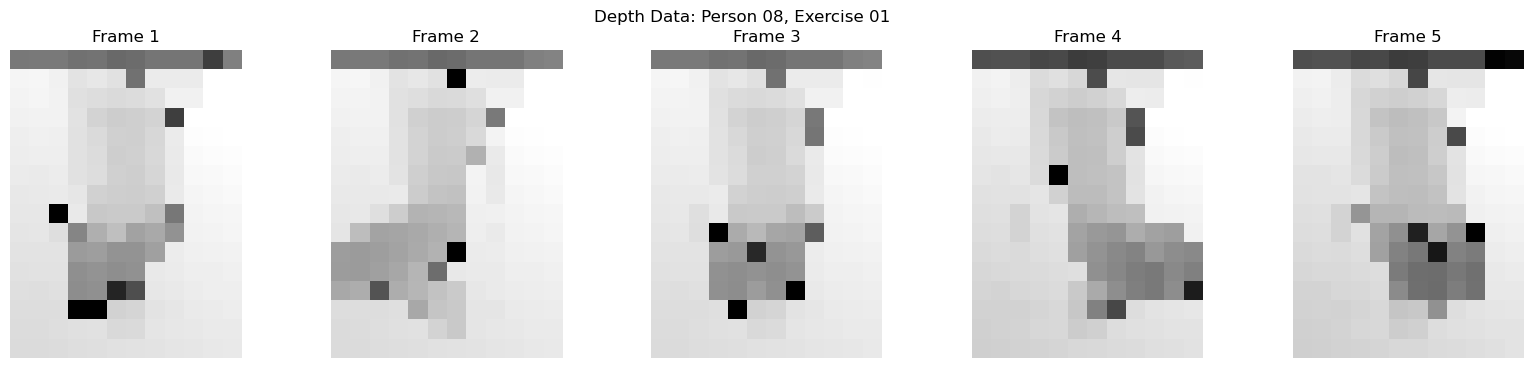

Testing Example 2:


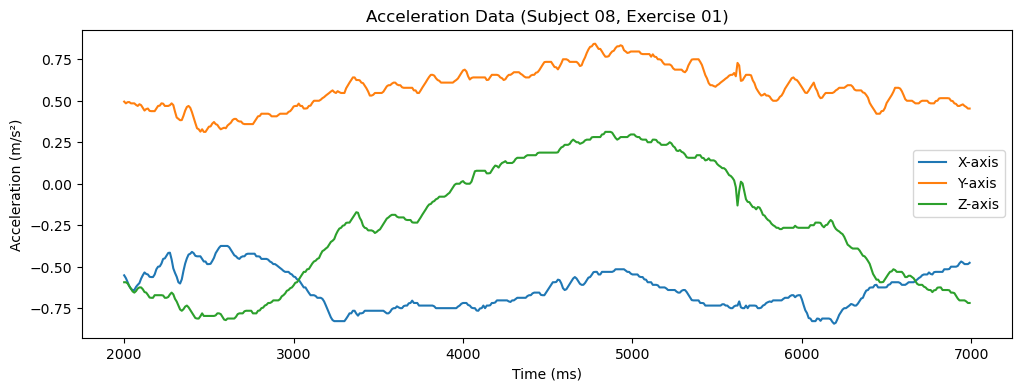

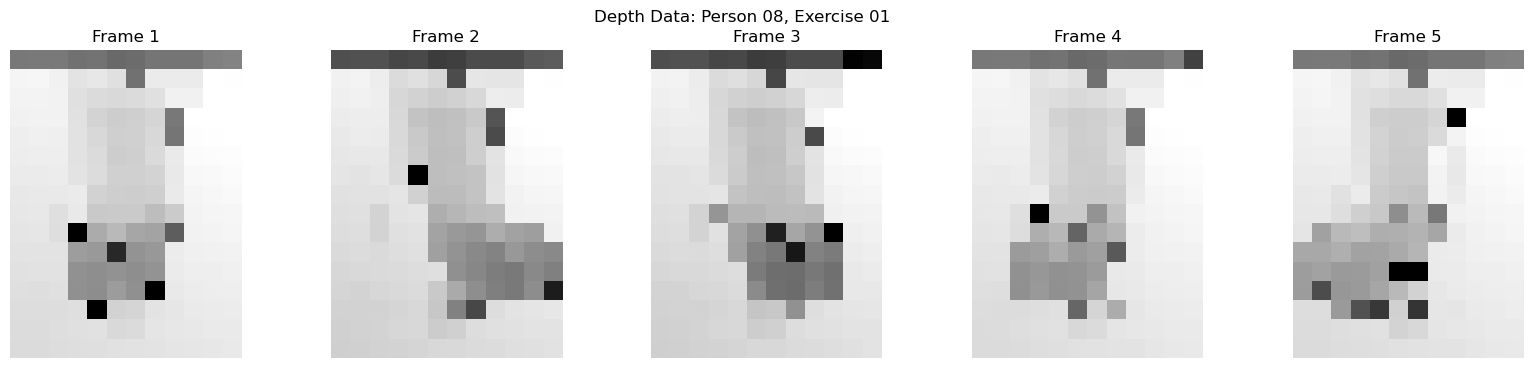

Testing Example 3:


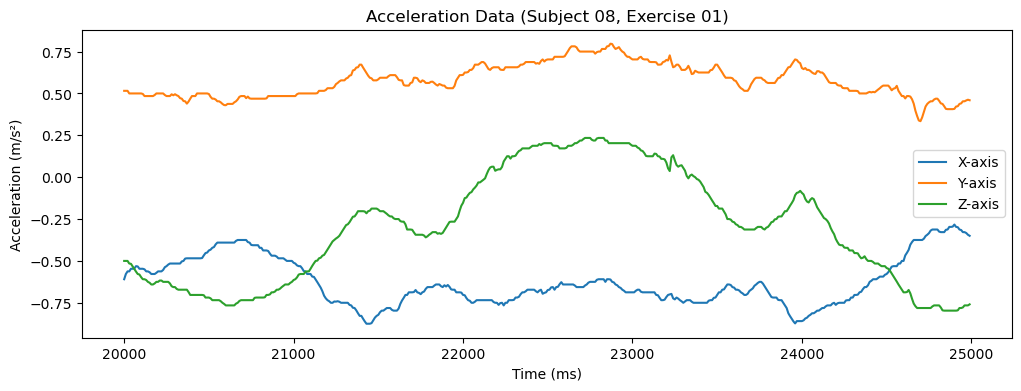

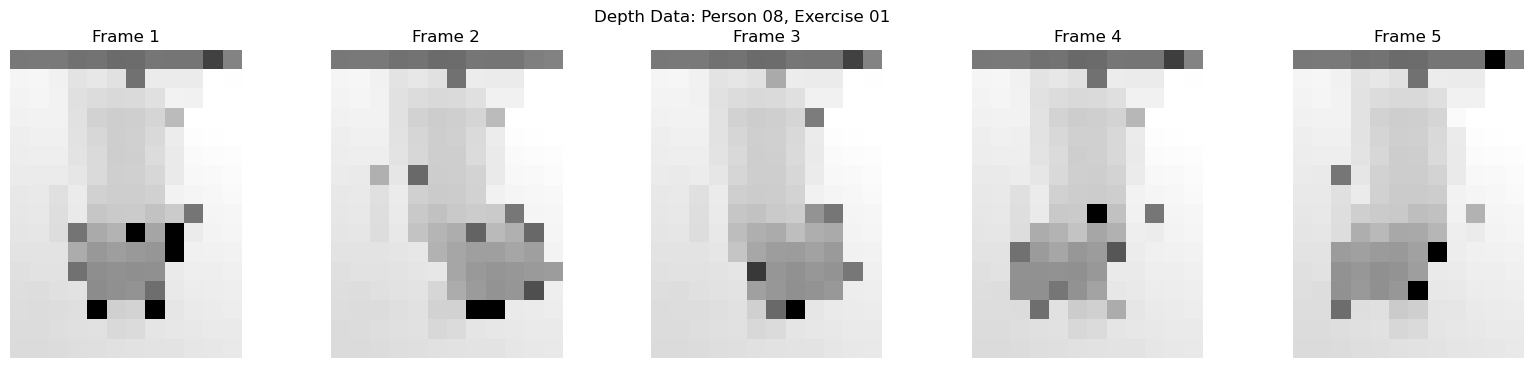

Testing Example 4:


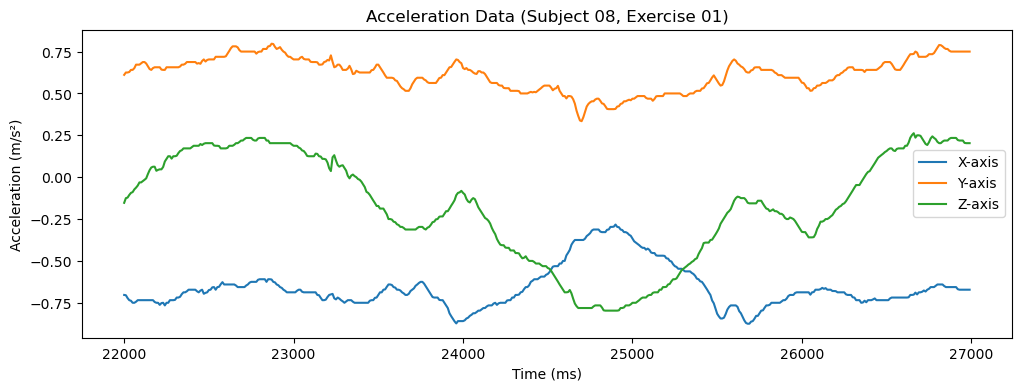

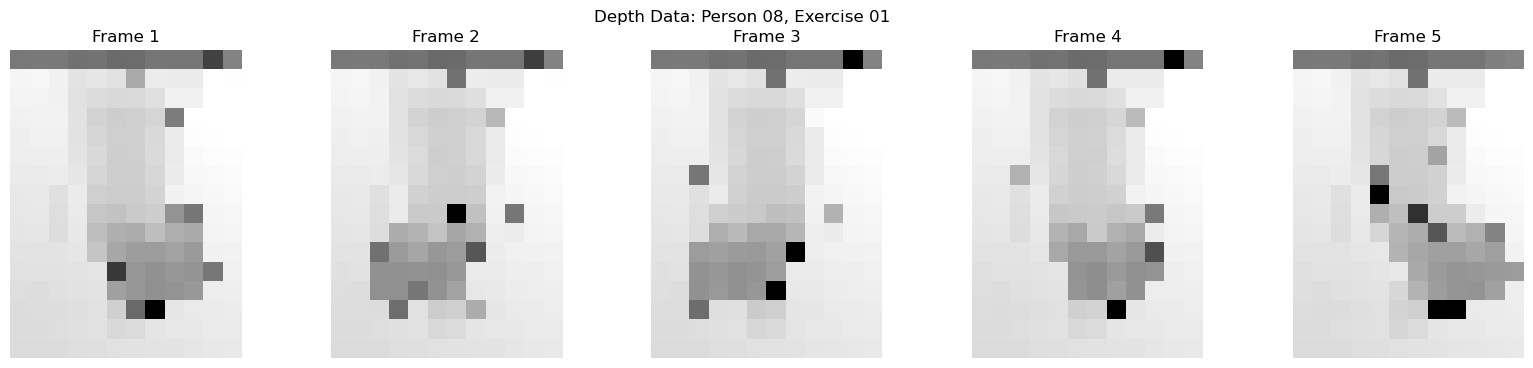

Testing Example 5:


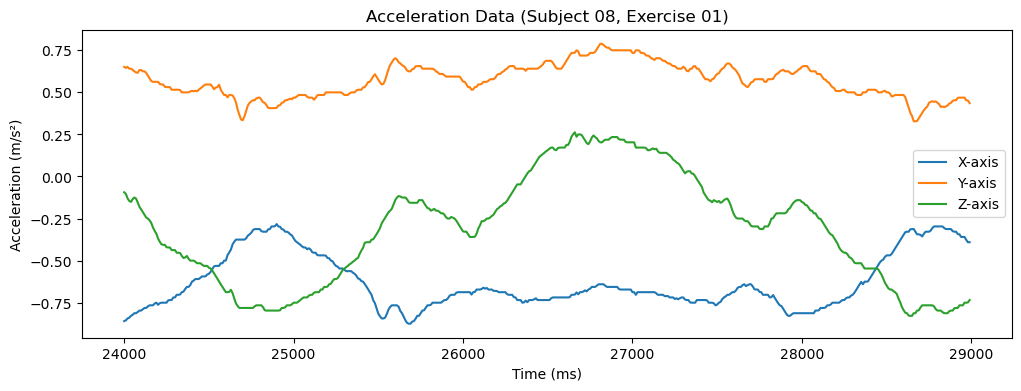

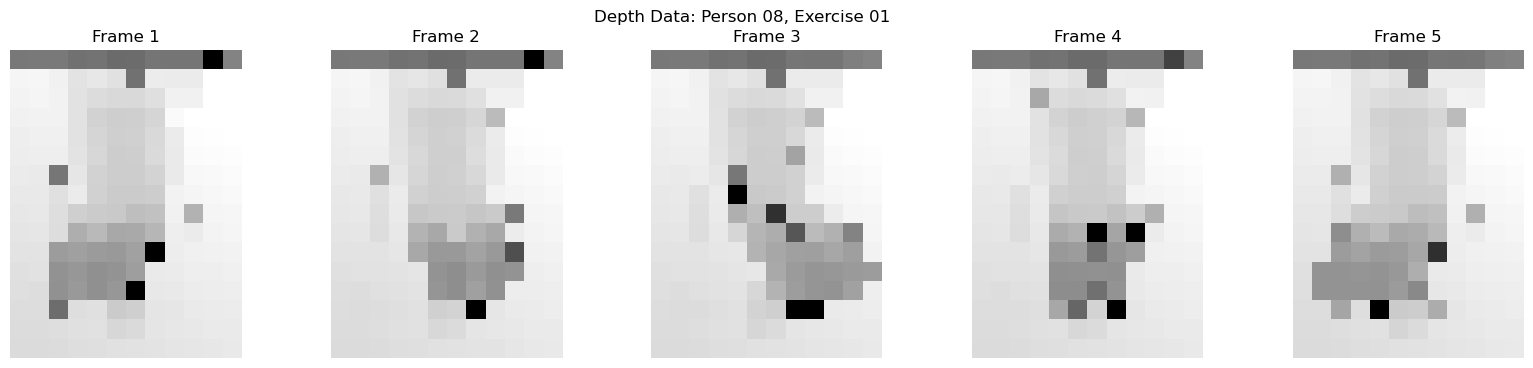

In [27]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def plot_acceleration(data_row):
    """
    Plots acceleration data for a single window.
    
    Parameters:
    data_row (pd.Series): Row containing acceleration data with 'df' as the DataFrame
    """
    accel_data = data_row['df']
    plt.figure(figsize=(12, 4))
    plt.plot(accel_data['time'], accel_data['acc_0'], label='X-axis')
    plt.plot(accel_data['time'], accel_data['acc_1'], label='Y-axis')
    plt.plot(accel_data['time'], accel_data['acc_2'], label='Z-axis')
    plt.title(f"Acceleration Data (Subject {data_row['subject_id']}, Exercise {data_row['exercise_id']})")
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration (m/s²)')
    plt.legend()
    plt.show()


def plot_depth(data_row):
    """
    Plots depth camera data for a single window as multiple frames.
    
    Parameters:
    data_row (pd.Series): Row containing depth camera data with 'df' as the DataFrame
    """
    depth_data = data_row['df']
    depth_values = depth_data.iloc[:, 1:].to_numpy()  # Exclude 'time' column

    # Ensure the data can be reshaped properly
    num_frames = depth_values.shape[0]  # Number of frames
    frame_size = 12 * 16  # Expected size per frame

    if depth_values.shape[1] != frame_size:
        print(f"Error: Depth data cannot be reshaped to (12, 16) for Subject {data_row['subject_id']}, Exercise {data_row['exercise_id']}")
        return

    # Reshape and visualize the frames
    fig, axes = plt.subplots(1, min(5, num_frames), figsize=(20, 4))
    for i, ax in enumerate(axes):
        if i >= num_frames:
            break
        depth_frame = depth_values[i, :].reshape(12, 16).T  # Reshape to 16x12 and transpose
        ax.imshow(depth_frame, cmap="gray")
        ax.axis("off")
        ax.set_title(f"Frame {i+1}")
    plt.suptitle(f"Depth Data: Person {data_row['subject_id']}, Exercise {data_row['exercise_id']}")
    plt.show()


def align_sensor_data(accel_data, depth_data):
    """
    Aligns acceleration and depth camera data based on subject_id, exercise_id, and window_idx.
    Drops rows that don't have matching data in both sensors.
    
    Parameters:
    accel_data (pd.DataFrame): DataFrame containing acceleration sensor data
    depth_data (pd.DataFrame): DataFrame containing depth camera data
    
    Returns:
    tuple: (aligned_accel, aligned_depth) - Pair of DataFrames with matching rows
    """
    # Create a unique identifier for each window
    def create_identifier(df):
        return df['subject_id'] + '_' + df['exercise_id'] + '_' + df['window_idx'].astype(str)
    
    # Add identifier column to both dataframes
    accel_data = accel_data.copy()
    depth_data = depth_data.copy()
    
    accel_data['identifier'] = create_identifier(accel_data)
    depth_data['identifier'] = create_identifier(depth_data)
    
    # Find common identifiers
    common_identifiers = set(accel_data['identifier']).intersection(set(depth_data['identifier']))
    
    # Filter both dataframes to keep only rows with matching data
    aligned_accel = accel_data[accel_data['identifier'].isin(common_identifiers)]
    aligned_depth = depth_data[depth_data['identifier'].isin(common_identifiers)]
    
    # Sort both dataframes by identifier to ensure they're aligned
    aligned_accel = aligned_accel.sort_values('identifier').reset_index(drop=True)
    aligned_depth = aligned_depth.sort_values('identifier').reset_index(drop=True)
    
    # Drop the temporary identifier column
    aligned_accel = aligned_accel.drop('identifier', axis=1)
    aligned_depth = aligned_depth.drop('identifier', axis=1)
    
    return aligned_accel, aligned_depth



# Step 1: Identify Training and Testing Subjects
train_subjects = ['01', '02', '03', '04', '05', '06', '07']
test_subjects = ['08', '09', '10']

# Step 2: Filter Training and Testing Data
train_data = df_records_windowed[df_records_windowed['subject_id'].isin(train_subjects)]
test_data = df_records_windowed[df_records_windowed['subject_id'].isin(test_subjects)]

train_grouped = train_data.groupby(['subject_id', 'exercise_id', 'window_idx'])
train_filtered = train_grouped.filter(lambda x: 'acc' in x['sensor'].values and 'dc' in x['sensor'].values)


train_accel = train_filtered[train_filtered['sensor'] == 'acc']
train_depth = train_filtered[train_filtered['sensor'] == 'dc']

train_accel, train_depth = align_sensor_data(train_accel, train_depth)

# print(train_accel.iloc[0])
# print(train_depth.iloc[0])




print("Training Set Statistics:")
print(f"Number of acceleration windows: {len(train_accel)}")
print(f"Number of depth camera windows: {len(train_depth)}")
print(f"Dimensions of acceleration data: {train_accel['df'].iloc[0].shape}")
print(f"Dimensions of depth data: {train_depth['df'].iloc[0].shape}")

# same thing for testing data 

test_grouped = test_data.groupby(['subject_id', 'exercise_id', 'window_idx'])
test_filtered = test_grouped.filter(lambda x: 'acc' in x['sensor'].values and 'dc' in x['sensor'].values)


test_accel = test_filtered[test_filtered['sensor'] == 'acc']
test_depth = test_filtered[test_filtered['sensor'] == 'dc']

test_accel, test_depth = align_sensor_data(test_accel, test_depth)

print("\nTesting Set Statistics:")
print(f"Number of acceleration windows: {len(test_accel)}")
print(f"Number of depth camera windows: {len(test_depth)}")
print(f"Dimensions of acceleration data: {test_accel['df'].iloc[0].shape}")
print(f"Dimensions of depth data: {train_depth['df'].iloc[0].shape}")

print("Visualizing Training Examples:")
for i in range(min(5, len(train_accel))):  # Ensure we don't exceed the data length
    print(f"Training Example {i+1}:")
    train_example_accel = train_accel.iloc[i]
    train_example_depth = train_depth.iloc[i]

    plot_acceleration(train_example_accel)
    plot_depth(train_example_depth)

# Visualize the first 30 testing examples
print("\nVisualizing Testing Examples:")
for i in range(min(5, len(test_accel))):  # Ensure we don't exceed the data length
    print(f"Testing Example {i+1}:")
    test_example_accel = test_accel.iloc[i]
    test_example_depth = test_depth.iloc[i]

    plot_acceleration(test_example_accel)
    plot_depth(test_example_depth)



# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

#### For task 2.1 here's a breakdown for the things that are needed to be done.

- Preprocessing Accelerometer Data by downsampling from 100 to 25 HZ, resultng in 125 x 3 matrix.
- Normalize data to have zero mean and unit variance (note: we tried doing this after PCA and LDA and it shows better results)
- Dimensionality Reduction with PCA with 5 comps on each axis (both trainig & testing data)
- LDA with 5 components on each axis 
- Concat PCA and LDA features into single vector: 3 x (5 + 5) 

- * (doing the normaliztion here)
- Training KNN classifier with k = 5 on the fused PCA and LDA features, Eval: predict labels for the test dataset using the classifier. 

## Evaluation
- confusion matrix 
- F1 score and classification report (precision, recall, F1 scores, and overall accuracy for each class)

Train Accel Processed Shape: (1486, 125, 3)
Test Accel Processed Shape: (598, 125, 3)
Unique Train Labels
{1, 2, 3, 4, 5, 6, 7}
Train Transformed Shape: (1486, 30)
Test Transformed Shape: (598, 30)


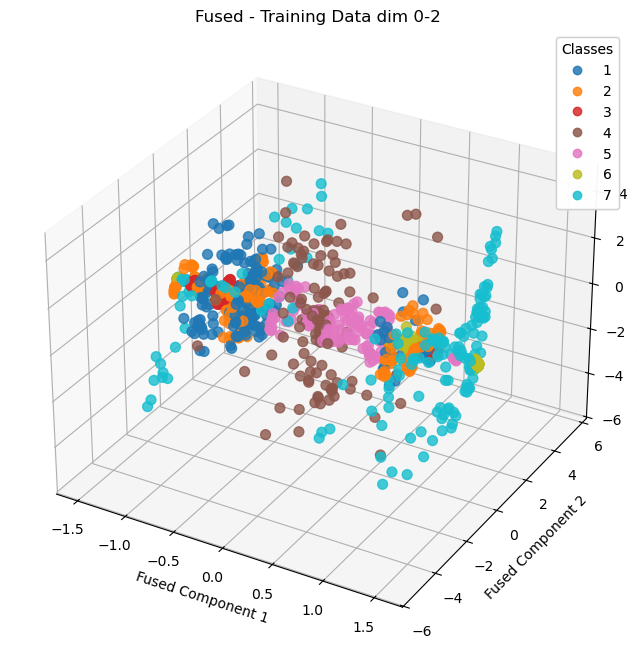

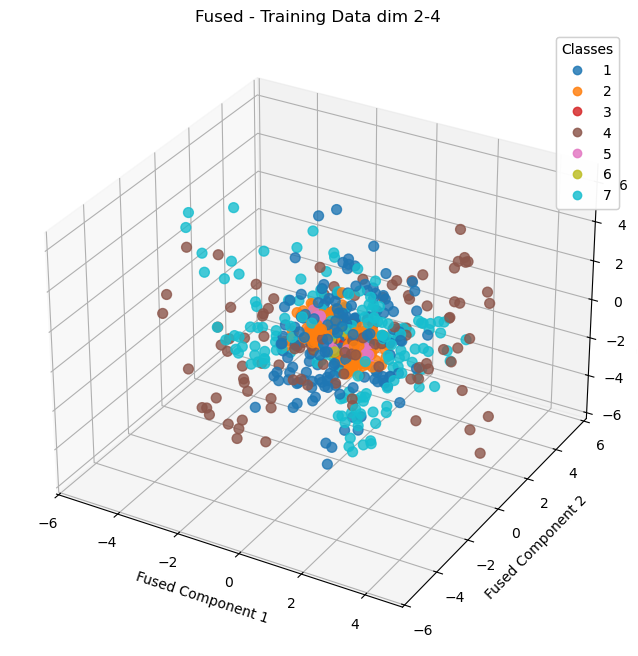

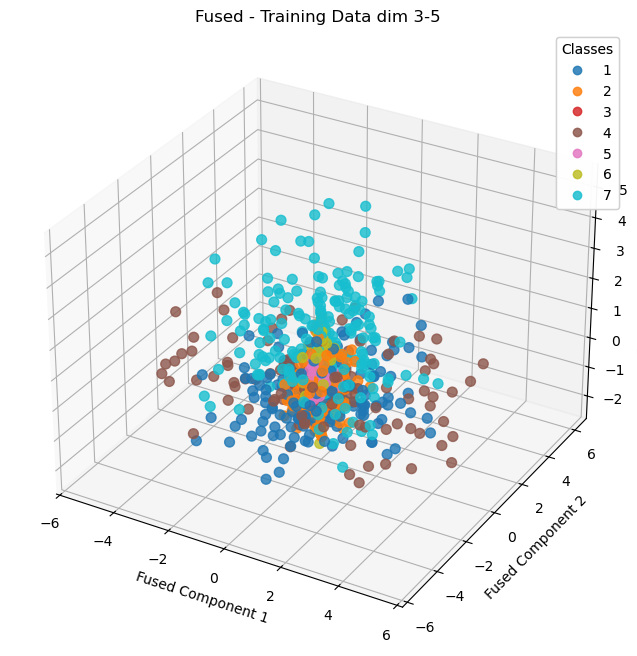

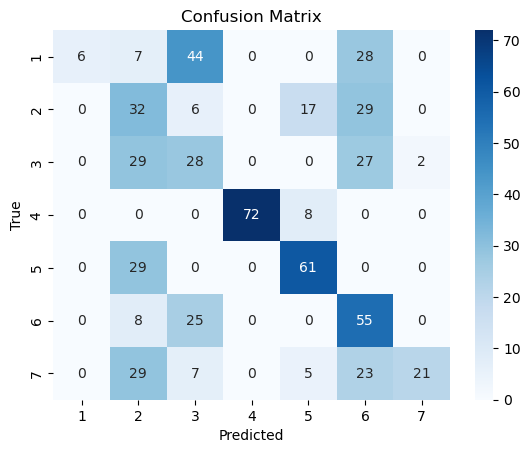

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.07      0.13        85
           2       0.24      0.38      0.29        84
           3       0.25      0.33      0.29        86
           4       1.00      0.90      0.95        80
           5       0.67      0.68      0.67        90
           6       0.34      0.62      0.44        88
           7       0.91      0.25      0.39        85

    accuracy                           0.46       598
   macro avg       0.63      0.46      0.45       598
weighted avg       0.63      0.46      0.45       598

Accuracy: 0.4599


In [28]:
# 2.1

### Your code begins here ###
from scipy.signal import resample
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D



def plot_3d(data, labels, title, method):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        data[:, 0], data[:, 1], data[:, 2], 
        c=labels, cmap="tab10", s=50, alpha=0.8
    )
    ax.set_title(f'{method} - {title}')
    ax.set_xlabel(f'{method} Component 1')
    ax.set_ylabel(f'{method} Component 2')
    ax.set_zlabel(f'{method} Component 3')
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    plt.show()

def plot_2d(data, labels, title, method):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=data[:, 0], 
        y=data[:, 1], 
        hue=labels, 
        palette="tab10", 
        s=50
    )
    plt.title(f'{method} - {title}')
    plt.xlabel(f'{method} Component 1')
    plt.ylabel(f'{method} Component 2')
    plt.legend(title="Classes", loc='best')
    plt.grid(True)
    plt.show()

# preprocess acceleration data
def preprocess_accel_data(data): 
    """
    Resample and standardize accelerometer data.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing acceleration data with 'df' column.

    Returns:
    np.ndarray: Resampled and standardized data of shape (n_samples, 125, 3).
    """
    processed_data = []
    for row in data['df']:
        # Resample to 125 timesteps
        
        resampled = resample(row[['acc_0', 'acc_1', 'acc_2']].values, 125, axis=0)
        # print(resampled)
        # Standardize the data along each axis (X, Y, Z)


        #TODO: Uncomment these 3 lines to follow the original method of scaling before calculating PCA & LDA

        # scaler = StandardScaler()
        # standardized = scaler.fit_transform(resampled)
        # processed_data.append(standardized)

        # TODO: comment this line if you're uncommenting the above 3 lines
        processed_data.append(resampled)
    return np.array(processed_data)

# preprocess train and test data
train_accel_processed = preprocess_accel_data(train_accel)
test_accel_processed = preprocess_accel_data(test_accel)

# print(train_accel_processed[0])

# check result
print(f"Train Accel Processed Shape: {train_accel_processed.shape}")  # (n_samples, 125, 3)
print(f"Test Accel Processed Shape: {test_accel_processed.shape}")    # (n_samples, 125, 3)


def apply_pca_lda(train_data, test_data, labels, n_components=5):
    """
    Apply PCA and LDA to reduce dimensionality of accelerometer data.

    Parameters:
    train_data: Preprocessed training data of shape (n_samples, 125, 3).
    test_data: Preprocessed test data of shape (n_samples, 125, 3).
    labels: Labels corresponding to training data: {1, 2, 3, 4, 5, 6, 7}
    n_components (int): Number of components for PCA and LDA. should be 5 by default

    Returns:
    tuple: Transformed train and test data of shape (n_samples, 30). 3 x (5 + 5)
    """
    train_transformed = []
    test_transformed = []
    
    for axis in range(3):  # Process each axis separately (X, Y, Z)
        # Apply PCA
        pca = PCA(n_components=n_components)
        train_pca = pca.fit_transform(train_data[:, :, axis])
        test_pca = pca.transform(test_data[:, :, axis])
        # Apply LDA
        lda = LDA(n_components=n_components)
        train_lda = lda.fit_transform(train_data[:, :, axis], labels)
        test_lda = lda.transform(test_data[:, :, axis])
        # plot_3d(train_pca[:, :3], train_labels, "Training Data", "PCA")
        # plot_3d(train_lda[:, :3], train_labels, "Training Data", "LDA")
        # plot_2d(train_pca[:, 2:4], train_labels, "Training Data", "PCA")
        # plot_2d(train_lda[:, 2:4], train_labels, "Training Data", "LDA")
        # plot_2d(train_pca[:, :2], train_labels, "Training Data", "PCA")
        # plot_2d(train_lda[:, :2], train_labels, "Training Data", "LDA")

        # Concatenate PCA and LDA results
        train_transformed.append(np.hstack((train_pca, train_lda)))
        test_transformed.append(np.hstack((test_pca, test_lda)))
        
    # Combine all axes
    train_final = np.hstack(train_transformed)
    test_final = np.hstack(test_transformed)
    
    return train_final, test_final

# lables for train data
train_labels = train_accel['exercise_id'].astype(int)
print("Unique Train Labels")
print(set(train_labels))

# appply transformation
train_transformed, test_transformed = apply_pca_lda(train_accel_processed, test_accel_processed, train_labels)

# check results
print(f"Train Transformed Shape: {train_transformed.shape}")  # (n_samples, 30)
print(f"Test Transformed Shape: {test_transformed.shape}")    # (n_samples, 30)


# adding standardization because scales different for LDA and PCA

# TODO: comment these 3 lines if you're uncommenting the above 3 lines to test results from prev approach
scaler = MinMaxScaler()
train_fused = scaler.fit_transform(train_transformed)
test_fused = scaler.transform(test_transformed)

plot_3d(train_fused[:, :3], train_labels, "Training Data dim 0-2", "Fused")
plot_3d(train_fused[:, 2:5], train_labels, "Training Data dim 2-4", "Fused")
plot_3d(train_fused[:, 3:6], train_labels, "Training Data dim 3-5", "Fused")


# train kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_transformed, train_labels)

# predictions on test data
test_labels = test_accel['exercise_id'].astype(int)
test_predictions = knn.predict(test_transformed)

# confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# F1-Score
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy:.4f}")

### Your code ends here ###

The results were not so good. The F1 scores were falling under 40. So we tried to test with not doing the normalization, perform PCA & LDA and then do the normalization of the results and that gave us the following improvements:

### Results Before Applying Scaler

| Metric         | Value  |
|----------------|--------|
| **Accuracy**   | 0.39   |
| **Macro Avg**  | **Precision**: 0.42<br>**Recall**: 0.39<br>**F1-Score**: 0.39 |
| **Weighted Avg** | **Precision**: 0.42<br>**Recall**: 0.39<br>**F1-Score**: 0.39 |

---

### Results After Applying Scaler

| Metric         | Value  |
|----------------|--------|
| **Accuracy**   | 0.46   |
| **Macro Avg**  | **Precision**: 0.63<br>**Recall**: 0.46<br>**F1-Score**: 0.45 |
| **Weighted Avg** | **Precision**: 0.63<br>**Recall**: 0.46<br>**F1-Score**: 0.45 |



#### Accuracy:

Before: 0.39
After: 0.46
An increase in accuracy shows that scaling the features helped the k-NN classifier better distinguish between classes.
<br><br>
#### Macro Average (Precision, Recall, F1-Score):

Before: Precision, Recall, and F1-Score were all 0.39–0.42.
After: Precision improved to 0.63, with Recall and F1-Score increasing to 0.46 and 0.45 respectively.
This indicates better performance across all classes on average, with the classifier becoming more reliable.
<br><br><br>
#### Weighted Average (Precision, Recall, F1-Score):

Before: All scores were around 0.39–0.42.
After: All scores increased to 0.63 (Precision) and 0.46 (Recall and F1-Score).
Weighted averages are influenced by class imbalance, so this indicates better handling of both majority and minority classes.

Here we are deviated from the instructions after trying out what we had in the instructions. 

Moreover, we tried out different visualizations to try to understand what's the spread of the dimensionally reduced data. We plotted 3D and 2D plots for both LDA and PCA. We can see patterns that are associated with dfferent classes. Interesting how PCA and LDA looks so different from each other on the same dataset. Then we made a 3D plot of the fused data. 3 plots for all the 5 dimensions. And it's interesting how each set of dimensions show differnt features and set of clusters.


<a id='task2'></a>
<div class=" alert alert-warning">
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

#### Depth Img Data

Preprocess Depth Image Data by flattening each 12× 16 depth matrix into a 192-dimensional vector.

Normalize data to have zero mean and unit variance.

Dimensionality Reduction with PCA (5 components) on the entire dataset (training & testing).

LDA with 5 components using training labels.

Concatenate PCA and LDA features into a single vector: 
5
+
5
=
10
5+5=10.

Train kNN classifier with 
𝑘
=
1
k=1 on the fused PCA and LDA features.

Evaluate: predict labels for the test dataset using the trained classifier.

Evaluation
Confusion matrix.
F1 score and classification report (precision, recall, F1 scores, and overall accuracy for each class).


Shape after preprocessing: (1486, 5, 192)
Final feature shape: (1486, 50)
Best K: 2
Confusion Matrix:
[[85  0  0  0  0  0  0]
 [10 65  9  0  0  0  0]
 [36 50  0  0  0  0  0]
 [40  7  0 33  0  0  0]
 [24  0  0  0 66  0  0]
 [ 0  0  0  0  0 38 50]
 [ 0  0  0  1  0 11 73]]

Classification Report:
              precision    recall  f1-score   support

           1     0.4359    1.0000    0.6071        85
           2     0.5328    0.7738    0.6311        84
           3     0.0000    0.0000    0.0000        86
           4     0.9706    0.4125    0.5789        80
           5     1.0000    0.7333    0.8462        90
           6     0.7755    0.4318    0.5547        88
           7     0.5935    0.8588    0.7019        85

    accuracy                         0.6020       598
   macro avg     0.6155    0.6015    0.5600       598
weighted avg     0.6156    0.6020    0.5611       598

Accuracy: 0.6020


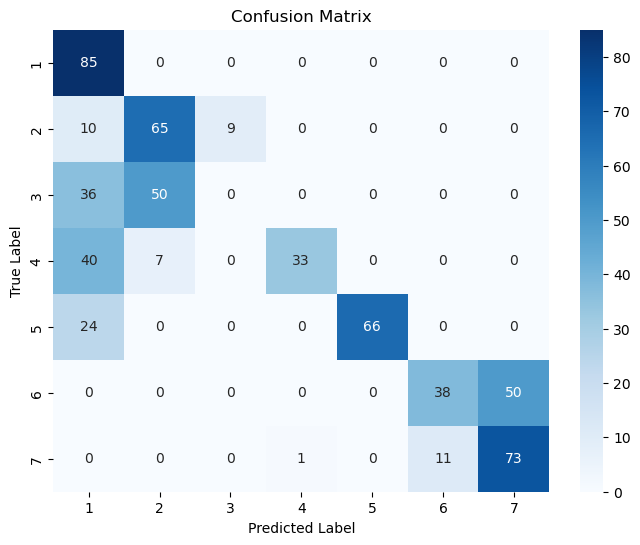

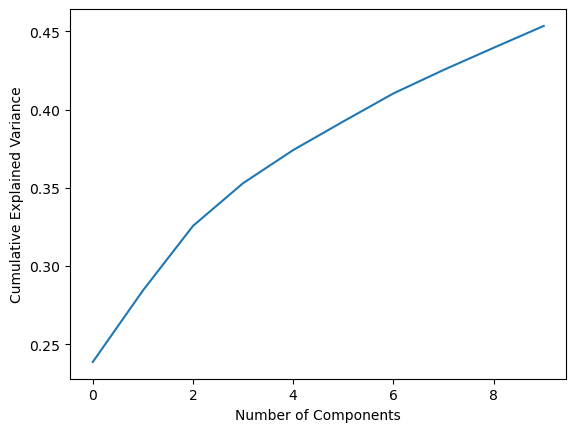

In [35]:
# 2.2

### Your code begins here ###

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# --- 1. preprocessing of depth image data ---
# Reshape depth data (12x16) to 192-dimensional vectors
def preprocess_depth_data(depth_df):
    """Process depth data by:
    1. Removing time column
    2. Processing each frame separately
    3. Stacking all frames together
    """
    processed_frames = []
    
    for _, row in depth_df.iterrows():
        # Get the depth frame data (excluding time column)
        depth_frames = row['df'].iloc[:, 1:].to_numpy()  # Skip time column
        processed_frames.append(depth_frames)
    
    return np.array(processed_frames)


def apply_transformations(train_data, test_data, train_labels, n_components=5):
    pca = PCA(n_components=n_components)
    lda = LDA(n_components=n_components)
    
    # Process each frame
    train_transformed = []
    test_transformed = []
    
    for frame_idx in range(5):  # Process each frame separately
        # Get current frame data
        train_frame = train_data[:, frame_idx, :]
        test_frame = test_data[:, frame_idx, :]
        
        # Apply PCA
        train_pca = pca.fit_transform(train_frame)
        test_pca = pca.transform(test_frame)
        
        # Apply LDA
        train_lda = lda.fit_transform(train_frame, train_labels)
        test_lda = lda.transform(test_frame)
        
        # Combine PCA and LDA features
        train_combined = np.hstack([train_pca, train_lda])
        test_combined = np.hstack([test_pca, test_lda])
        
        train_transformed.append(train_combined)
        test_transformed.append(test_combined)
    
    # Stack all frames together
    train_final = np.hstack(train_transformed)
    test_final = np.hstack(test_transformed)
    
    return train_final, test_final

# Process train and test data
train_depth_data = preprocess_depth_data(train_depth)
test_depth_data = preprocess_depth_data(test_depth)

print("Shape after preprocessing:", train_depth_data.shape)  # Should be (n_samples, 5, 192)

# Reshape to process all frames together
n_train_samples = train_depth_data.shape[0]
n_test_samples = test_depth_data.shape[0]
train_depth_flat = train_depth_data.reshape(-1, 192)  # Flatten all frames
test_depth_flat = test_depth_data.reshape(-1, 192)

# Standardize the flattened data
scaler = MinMaxScaler()
train_depth_std = scaler.fit_transform(train_depth_flat)
test_depth_std = scaler.transform(test_depth_flat)

# Reshape back to separate frames
train_depth_std = train_depth_std.reshape(n_train_samples, 5, 192)
test_depth_std = test_depth_std.reshape(n_test_samples, 5, 192)



# labels for train and test data
train_labels = train_depth['exercise_id'].astype(int)
test_labels = test_depth['exercise_id'].astype(int)


# Apply transformations
train_features, test_features = apply_transformations(
    train_depth_std, test_depth_std, train_labels
)

print("Final feature shape:", train_features.shape)  # Should be (n_samples, 50)

# TEST to See the best K value 

param_grid = {'n_neighbors': [1,2, 3,4, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(train_features, train_labels)
best_k = grid_search.best_params_['n_neighbors']
print("Best K:",best_k)
nn_classifier = KNeighborsClassifier(n_neighbors=best_k)
nn_classifier.fit(train_features, train_labels)
predictions = nn_classifier.predict(test_features)

# End Test 

# --- 5. evaluation ---
# confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# F1 score & statistics
report = classification_report(test_labels, predictions, digits=4)
print("\nClassification Report:")
print(report)
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Your code ends here ###


- **Accuracy**: 0.4498 (out of 598 samples)

#### Classification Report:
- **Macro Average**:
    - Precision: 0.5390
    - Recall: 0.4487
    - F1-Score: 0.4294

- **Weighted Average**:
    - Precision: 0.5396
    - Recall: 0.4498
    - F1-Score: 0.4313



Here we tried out the same technique of doing the normalization after performing LDA and PCA and it resulted in the following: 

- **Accuracy**: 0.3980 (out of 598 samples)

#### Classification Report:
- **Macro Average**:
    - Precision: 0.4962
    - Recall: 0.3958
    - F1-Score: 0.3924

- **Weighted Average**:
    - Precision: 0.4974
    - Recall: 0.3980
    - F1-Score: 0.3952

This clearly shows that the performance dropped here because of Normalizing afterwards.



But there was a problem in the above code. We were flattening all the 5 frames together, which was causing problems. 

### Correction 
We corrected the code by applying PCA and LDA to each frame separately and then concatenating the results. This way we were able to get the correct shape and the performance and accuracy to 0.60. And the best K value for KNN was 2 in this case so we ran the results with K=2.


# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   

<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>

Document your work.
    
</div>

In this part we need to have 10 dimensions for each x y & z axis and then add 6 more that are mean and sd of each so in total 10 + 10 + 10 + 6= 36.

In [69]:
# 3.1

### Your code begins here ###

def apply_pca_to_axes(train_data, test_data, n_components=10):
    """
    Apply PCA separately to each axis (X, Y, Z) and concatenate results.

    Parameters:
    train_data: ndarray of shape (n_samples, 125, 3)
        Preprocessed training accelerometer data.
    test_data: ndarray of shape (n_samples, 125, 3)
        Preprocessed testing accelerometer data.
    n_components: int
        Number of PCA components per axis. default is 10

    Returns:
    tuple: Transformed train and test data of shape (n_samples, 30)
        Combined PCA features from all three axes.
    """
    train_transformed = []
    test_transformed = []
    
    for axis in range(3):  # Iterate over each axis (X, Y, Z)
        # Normalize the data for the current axis
        scaler = MinMaxScaler()
        train_axis_scaled = scaler.fit_transform(train_data[:, :, axis])
        test_axis_scaled = scaler.transform(test_data[:, :, axis])
        
        # Apply PCA to the current axis
        pca = PCA(n_components=n_components)
        train_pca = pca.fit_transform(train_axis_scaled)
        test_pca = pca.transform(test_axis_scaled)
        
        # Append the PCA results
        train_transformed.append(train_pca)
        test_transformed.append(test_pca)
    
    # Concatenate PCA results from all axes
    train_final = np.hstack(train_transformed)
    test_final = np.hstack(test_transformed)
    
    return train_final, test_final

train_pca_features, test_pca_features = apply_pca_to_axes(train_accel_processed, test_accel_processed, n_components=10)



# 2. Statistische Features 
train_means = np.mean(train_accel_processed, axis=1)  # Shape: (n_samples, 3)
train_stds = np.std(train_accel_processed, axis=1)    # Shape: (n_samples, 3)
train_stat_features = np.hstack([train_means, train_stds])  # Shape: (n_samples, 6)

# to ensure we don't accidently have some other shape merging into the data
assert train_means.shape == (train_accel_processed.shape[0], 3), "Mean shape mismatch"
assert train_stds.shape == (train_accel_processed.shape[0], 3), "Std shape mismatch"


test_means = np.mean(test_accel_processed, axis=1)    # Shape: (n_samples, 3)
test_stds = np.std(test_accel_processed, axis=1)      # Shape: (n_samples, 3)
test_stat_features = np.hstack([test_means, test_stds])  # Shape: (n_samples, 6)

# 3. Kombinierte Features
accl_train_combined_features = np.hstack([train_pca_features, train_stat_features])  # Shape: (n_samples, 36)
accl_test_combined_features = np.hstack([test_pca_features, test_stat_features])    # Shape: (n_samples, 36)

# Ergebnisse prüfen
print(f"Train Combined Features Shape: {accl_train_combined_features.shape}")
print(f"Test Combined Features Shape: {accl_test_combined_features.shape}")

### Your code ends here ###

Train Combined Features Shape: (1486, 36)
Test Combined Features Shape: (598, 36)


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>

Document your work.
    
</div>

Over here we need to get 10 features out of each img. we've got 5 img frames so 10x5 = 50.

In [68]:
# 3.2

### Your code begins here ###

# --- 1. preprocessing of depth image data ---
# Reshape depth data (12x16) to 192-dimensional vectors
def preprocess_depth_data(depth_df):
    """Process depth data by:
    1. Removing time column
    2. Processing each frame separately
    3. Stacking all frames together
    """
    processed_frames = []
    
    for _, row in depth_df.iterrows():
        # Get the depth frame data (excluding time column)
        depth_frames = row['df'].iloc[:, 1:].to_numpy()  # Skip time column
        processed_frames.append(depth_frames)
    
    return np.array(processed_frames)

def apply_pca_transformations(train_data, test_data, n_components=10):
    """
    Apply PCA to each frame separately and concatenate results.
    
    Parameters:
    train_data: ndarray of shape (n_samples, 5, 192)
        Training depth camera data with 5 frames per sample
    test_data: ndarray of shape (n_samples, 5, 192)
        Testing depth camera data with 5 frames per sample
    n_components: int
        Number of PCA components per frame (default=10)
    
    Returns:
    tuple: (train_final, test_final)
        Transformed data with shape (n_samples, 50)
    """
    # Initialize lists to store transformed data
    train_transformed = []
    test_transformed = []
    
    # Process each frame separately
    for frame_idx in range(5):
        # Get current frame data
        train_frame = train_data[:, frame_idx, :]
        test_frame = test_data[:, frame_idx, :]
        
        # Initialize and apply PCA
        pca = PCA(n_components=n_components)
        train_pca = pca.fit_transform(train_frame)
        test_pca = pca.transform(test_frame)
        
        # Store transformed data
        train_transformed.append(train_pca)
        test_transformed.append(test_pca)
    
    # Concatenate all frames together
    train_final = np.hstack(train_transformed)  # Shape: (n_samples, 50)
    test_final = np.hstack(test_transformed)    # Shape: (n_samples, 50)
    
    return train_final, test_final

# Process train and test data
train_depth_data = preprocess_depth_data(train_depth)
test_depth_data = preprocess_depth_data(test_depth)

print("Shape after preprocessing:", train_depth_data.shape)  # Should be (n_samples, 5, 192)

# Reshape to process all frames together
n_train_samples = train_depth_data.shape[0]
n_test_samples = test_depth_data.shape[0]
train_depth_flat = train_depth_data.reshape(-1, 192)  # Flatten all frames
test_depth_flat = test_depth_data.reshape(-1, 192)

# Standardize the flattened data
scaler = MinMaxScaler()
train_depth_std = scaler.fit_transform(train_depth_flat)
test_depth_std = scaler.transform(test_depth_flat)

# Reshape back to separate frames
train_depth_std = train_depth_std.reshape(n_train_samples, 5, 192)
test_depth_std = test_depth_std.reshape(n_test_samples, 5, 192)



# labels for train and test data
train_labels = train_depth['exercise_id'].astype(int)
test_labels = test_depth['exercise_id'].astype(int)


# Apply transformations
depth_train_features, depth_test_features = apply_pca_transformations(
    train_depth_std, test_depth_std
)

print("Final feature shape:", train_features.shape)  # Should be (n_samples, 50)





### Your code ends here ###

Shape after preprocessing: (1486, 5, 192)
Final feature shape: (1486, 50)


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>

Note: Normalize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes. (The expected F1 score for this task should generally fall within the range of 55 to 70)
    
</div>

Joint feature shapes:
Training: (1486, 86)
Testing: (598, 86)

SVM Results:

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.84      0.90        85
           2       0.48      1.00      0.65        84
           3       0.00      0.00      0.00        86
           4       0.76      0.97      0.86        80
           5       1.00      0.80      0.89        90
           6       0.89      0.91      0.90        88
           7       0.86      0.88      0.87        85

    accuracy                           0.77       598
   macro avg       0.71      0.77      0.72       598
weighted avg       0.71      0.77      0.72       598



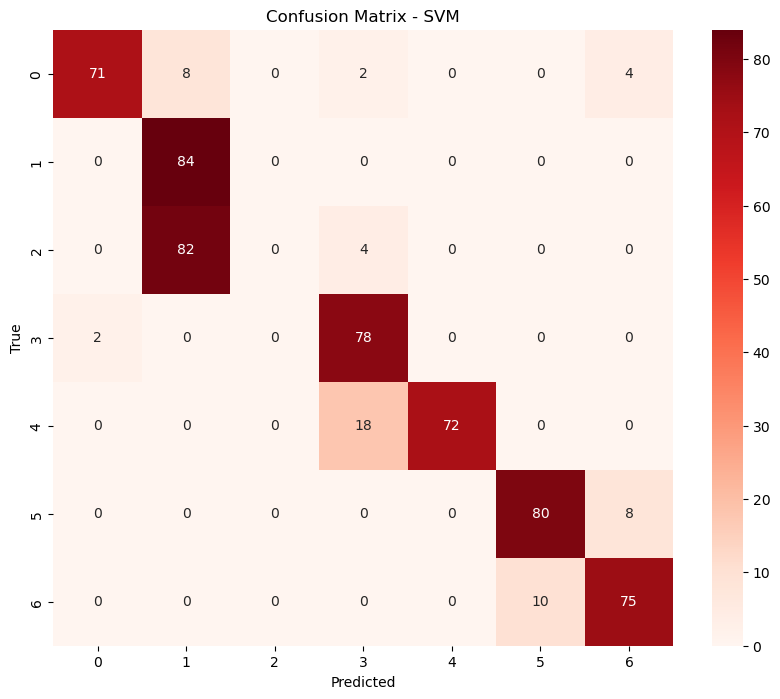


Naive Bayes Results:

Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.68      0.60        85
           2       0.58      0.69      0.63        84
           3       0.71      0.59      0.65        86
           4       1.00      0.46      0.63        80
           5       1.00      0.82      0.90        90
           6       0.98      1.00      0.99        88
           7       0.71      0.98      0.82        85

    accuracy                           0.75       598
   macro avg       0.79      0.75      0.75       598
weighted avg       0.79      0.75      0.75       598



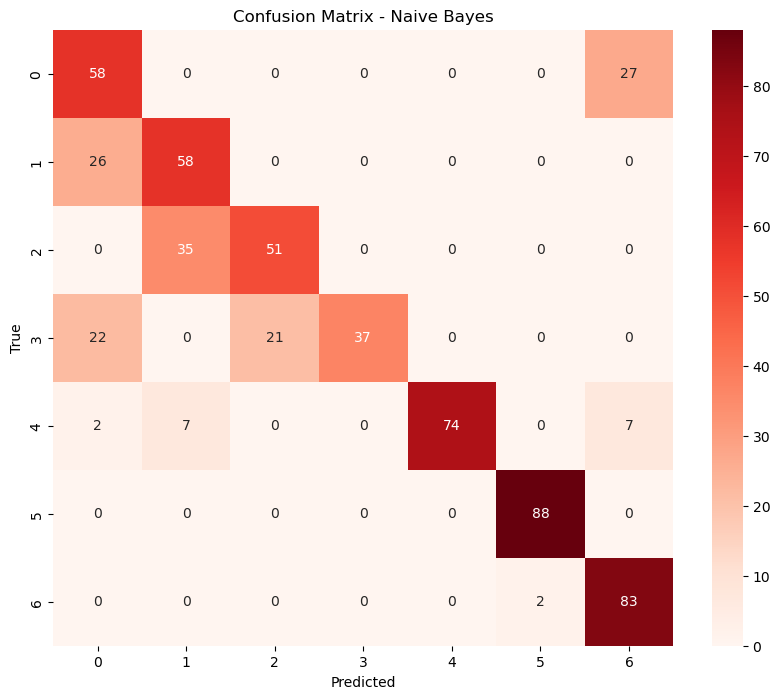


Accuracy Comparison:
SVM Accuracy: 0.7692
Naive Bayes Accuracy: 0.7508


In [67]:
# 3.3

### Your code begins here ###
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Make the confusion matrix 

def evaluate_classifier(y_true, y_pred, classifier_name):
    print(f"\n{classifier_name} Results:")
    
    # Calculate and print classification report with zero_division parameter
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()




train_joint_features = np.hstack([accl_train_combined_features, depth_train_features])  # Shape: (n_samples, 86)
test_joint_features = np.hstack([accl_test_combined_features, depth_test_features])    # Shape: (n_samples, 86)

print("Joint feature shapes:")
print(f"Training: {train_joint_features.shape}")
print(f"Testing: {test_joint_features.shape}")

# 2. Normalize features to [0,1] range using MinMaxScaler
scaler = MinMaxScaler()
train_joint_normalized = scaler.fit_transform(train_joint_features)
test_joint_normalized = scaler.transform(test_joint_features)

# 3. Initialize classifiers
svm_classifier = SVC(kernel='rbf', random_state=42) # with rbf kernel as instructed
nb_classifier = GaussianNB()

# 4. Train classifiers
svm_classifier.fit(train_joint_normalized, train_labels)
nb_classifier.fit(train_joint_normalized, train_labels)

# 5. Make predictions
svm_predictions = svm_classifier.predict(test_joint_normalized)
nb_predictions = nb_classifier.predict(test_joint_normalized)




#______ EVALUATION ______

# Evaluate SVM
evaluate_classifier(test_labels, svm_predictions, "SVM")

# Evaluate Naive Bayes
evaluate_classifier(test_labels, nb_predictions, "Naive Bayes")

# Compare accuracies
svm_accuracy = np.mean(svm_predictions == test_labels)
nb_accuracy = np.mean(nb_predictions == test_labels)

print("\nAccuracy Comparison:")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")





### Your code ends here ###

I changed the normalization from StandardScaler to MinMaxScaler and the results improved. So I went back and changed the normalization to MinMaxScaler for everything. And the resuts seem to be better. But I saw that is it better to use StandardScaler for the PCA and LDA. and MinMaxScaler for things like SVM and Naive Bayes. 


#### MinMaxScaler

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

#### StandardScaler

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$


Moreover, after looking at the note: Normalize data along each axis, we inferred that it's talking about the acc data more specifically, we tried doing it for each axis, the results did not improve with doing that. We reset back to the normal one back.

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br>
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0).
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$.<br>
Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>

Note: Normalize the data along each axis.
<br>

Document your work, answer the given question, evaluate the results, and analyse the outcomes.
    
</div>

In [95]:
# 4.1

### Your code begins here ###
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
import numpy as np

# Define parameter grids (unchanged) given in the assignment
svm_param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'gamma': [0.1, 0.25, 0.5, 0.75, 1.0, 2.0]
}

adaboost_param_grid = {
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0]
}


# ______ Normalization ______

def normalize_accelerometer_features(train_features, test_features):
    """
    Normalize accelerometer features along each axis separately.
    Assumes first 30 features are PCA components (10 for each axis)
    and last 6 are statistical features (mean and std for each axis)
    """
    normalized_train = np.zeros_like(train_features)
    normalized_test = np.zeros_like(test_features)
    
    # Normalize PCA components for each axis
    for i in range(3):  # For each axis (X, Y, Z)
        start_idx = i * 10
        end_idx = (i + 1) * 10
        scaler = MinMaxScaler()
        normalized_train[:, start_idx:end_idx] = scaler.fit_transform(train_features[:, start_idx:end_idx])
        normalized_test[:, start_idx:end_idx] = scaler.transform(test_features[:, start_idx:end_idx])
    
    # Normalize statistical features for each axis
    for i in range(2):  # For mean and std
        for j in range(3):  # For each axis
            idx = 30 + i * 3 + j  # Calculate index in the statistical features
            scaler = MinMaxScaler()
            normalized_train[:, idx] = scaler.fit_transform(train_features[:, idx].reshape(-1, 1)).ravel()
            normalized_test[:, idx] = scaler.transform(test_features[:, idx].reshape(-1, 1)).ravel()
    
    return normalized_train, normalized_test

def normalize_depth_features(train_features, test_features):
    """
    Normalize depth features for each frame separately.
    Assumes 10 PCA components for each of the 5 frames.
    """
    normalized_train = np.zeros_like(train_features)
    normalized_test = np.zeros_like(test_features)
    
    # Normalize each frame's PCA components separately
    for frame in range(5):  # For each frame
        start_idx = frame * 10
        end_idx = (frame + 1) * 10
        scaler = MinMaxScaler()
        normalized_train[:, start_idx:end_idx] = scaler.fit_transform(train_features[:, start_idx:end_idx])
        normalized_test[:, start_idx:end_idx] = scaler.transform(test_features[:, start_idx:end_idx])
    
    return normalized_train, normalized_test


# ______ Training with Grid Search ______

def train_with_grid_search(X_train, y_train, classifier, param_grid, modality_name):
    """
    Train classifier using grid search with 10-fold cross-validation
    """
    grid_search = GridSearchCV(
        classifier,
        param_grid,
        cv=10,
        n_jobs=-1,
        verbose=1,
        scoring='f1_macro'
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"\nBest parameters for {modality_name}:")
    print(grid_search.best_params_)
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_


# ______ Normalization Functions being called______

# Normalize features along each axis
acc_train_normalized, acc_test_normalized = normalize_accelerometer_features(
    accl_train_combined_features, 
    accl_test_combined_features
)

depth_train_normalized, depth_test_normalized = normalize_depth_features(
    depth_train_features, 
    depth_test_features
)

# Initialize base classifiers for each modality
svm_acc = SVC(kernel='rbf', random_state=0, probability=True)
svm_depth = SVC(kernel='rbf', random_state=0, probability=True)
adaboost_acc = AdaBoostClassifier(random_state=0, algorithm='SAMME') # SAMME is used, the default is SAMME.R which was giving deprication warning
adaboost_depth = AdaBoostClassifier(random_state=0, algorithm='SAMME')


# ______ Training with Grid Search  Accelerometer Data______
print("Training SVM and AdaBoost for accelerometer data...")
# Train SVM for accelerometer
svm_acc_best = train_with_grid_search(
    acc_train_normalized, 
    train_labels,
    svm_acc,
    svm_param_grid,
    "SVM - Accelerometer"
)

# Train AdaBoost for accelerometer
adaboost_acc_best = train_with_grid_search(
    acc_train_normalized,
    train_labels,
    adaboost_acc,
    adaboost_param_grid,
    "AdaBoost - Accelerometer"
)

# ______ Training with Grid Search  Depth Camera Data______

print("\nTraining SVM and AdaBoost for depth camera data...")
# Train SVM for depth camera
svm_depth_best = train_with_grid_search(
    depth_train_normalized,
    train_labels,
    svm_depth,
    svm_param_grid,
    "SVM - Depth Camera"
)

# Train AdaBoost for depth camera
adaboost_depth_best = train_with_grid_search(
    depth_train_normalized,
    train_labels,
    adaboost_depth,
    adaboost_param_grid,
    "AdaBoost - Depth Camera"
)

# ______ Saving Models ______

# Store the trained models and normalized test data
trained_models = {
    'svm_acc': svm_acc_best,
    'svm_depth': svm_depth_best,
    'adaboost_acc': adaboost_acc_best,
    'adaboost_depth': adaboost_depth_best
}

print("\nCalibrating classifiers...")
calibrated_models = {
    'svm_acc': CalibratedClassifierCV(svm_acc_best, cv='prefit').fit(acc_train_normalized, train_labels),
    'svm_depth': CalibratedClassifierCV(svm_depth_best, cv='prefit').fit(depth_train_normalized, train_labels),
    'adaboost_acc': CalibratedClassifierCV(adaboost_acc_best, cv='prefit').fit(acc_train_normalized, train_labels),
    'adaboost_depth': CalibratedClassifierCV(adaboost_depth_best, cv='prefit').fit(depth_train_normalized, train_labels),
}

test_data = {
    'acc': acc_test_normalized,
    'depth': depth_test_normalized
}

# ______Printing validation scores______

for name, model in trained_models.items():
    print(f"\nFinal training score for {name}: {model.score(eval(name.split('_')[1] + '_train_normalized'), train_labels):.4f}")

### Your code ends here ###

Training SVM and AdaBoost for accelerometer data...
Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best parameters for SVM - Accelerometer:
{'C': 100.0, 'gamma': 2.0}
Best cross-validation score: 0.9676
Fitting 10 folds for each of 20 candidates, totalling 200 fits

Best parameters for AdaBoost - Accelerometer:
{'learning_rate': 0.75, 'n_estimators': 500}
Best cross-validation score: 0.7836

Training SVM and AdaBoost for depth camera data...
Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best parameters for SVM - Depth Camera:
{'C': 10.0, 'gamma': 1.0}
Best cross-validation score: 0.9709
Fitting 10 folds for each of 20 candidates, totalling 200 fits

Best parameters for AdaBoost - Depth Camera:
{'learning_rate': 1.0, 'n_estimators': 1000}
Best cross-validation score: 0.6053

Calibrating classifiers...

Final training score for svm_acc: 1.0000

Final training score for svm_depth: 1.0000

Final training score for adaboost_acc: 0.9024

Final training scor

## Model Training Results

### SVM and AdaBoost Training for Accelerometer Data
- **Hyperparameter Optimization:**
  - SVM: Fitting 10 folds for each of 24 candidates, totaling 240 fits.
  - AdaBoost: Fitting 10 folds for each of 20 candidates, totaling 200 fits.

- **Best Parameters:**
  - **SVM - Accelerometer:** `{'C': 100.0, 'gamma': 2.0}`
  - **AdaBoost - Accelerometer:** `{'learning_rate': 0.75, 'n_estimators': 500}`

- **Best Cross-Validation Scores:**
  - **SVM - Accelerometer:** `0.9676`
  - **AdaBoost - Accelerometer:** `0.7836`

---

### SVM and AdaBoost Training for Depth Camera Data
- **Hyperparameter Optimization:**
  - SVM: Fitting 10 folds for each of 24 candidates, totaling 240 fits.
  - AdaBoost: Fitting 10 folds for each of 20 candidates, totaling 200 fits.

- **Best Parameters:**
  - **SVM - Depth Camera:** `{'C': 10.0, 'gamma': 1.0}`
  - **AdaBoost - Depth Camera:** `{'learning_rate': 1.0, 'n_estimators': 1000}`

- **Best Cross-Validation Scores:**
  - **SVM - Depth Camera:** `0.9709`
  - **AdaBoost - Depth Camera:** `0.6053`

---

### Final Training Scores
- **SVM - Accelerometer:** `1.0000`
- **SVM - Depth Camera:** `1.0000`
- **AdaBoost - Accelerometer:** `0.9024`
- **AdaBoost - Depth Camera:** `0.7133`

---

### Observations
The models show signs of **overfitting** to the training data, as indicated by the very high training scores compared to the lower cross-validation scores. Looking back from 4.2 where the F1 scores are 0.4 to 0.67 whereas in the trainig sets, it was in the 90s. So there is overfitting happening and here are some reasons why:

- **SVM Hyperparameters:**
  - Accelerometer: `C = 100.0, gamma = 2.0`
  - Depth Camera: `C = 10.0, gamma = 1.0`
  - These parameters suggest a high model complexity, which can lead to overfitting when the data is limited.
  
- **Things we could try to reduce overfitting:**
  - C lower values for `C` and `gamma`.
  - play around with the sampling in part 1 and get more datapoints to train the model.


<a id='task4'></a>
<div class=" alert alert-warning">


<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>


SVM - Accelerometer Results:

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.66      0.74        85
           2       0.32      0.51      0.39        84
           3       1.00      0.15      0.26        86
           4       1.00      0.95      0.97        80
           5       0.88      0.66      0.75        90
           6       0.55      0.81      0.65        88
           7       0.72      0.95      0.82        85

    accuracy                           0.67       598
   macro avg       0.76      0.67      0.66       598
weighted avg       0.76      0.67      0.66       598


SVM - Depth Camera Results:

Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.35      0.32        85
           2       0.44      0.73      0.55        84
           3       0.00      0.00      0.00        86
           4       0.86      0.68      0.76        80
           5       1.00  

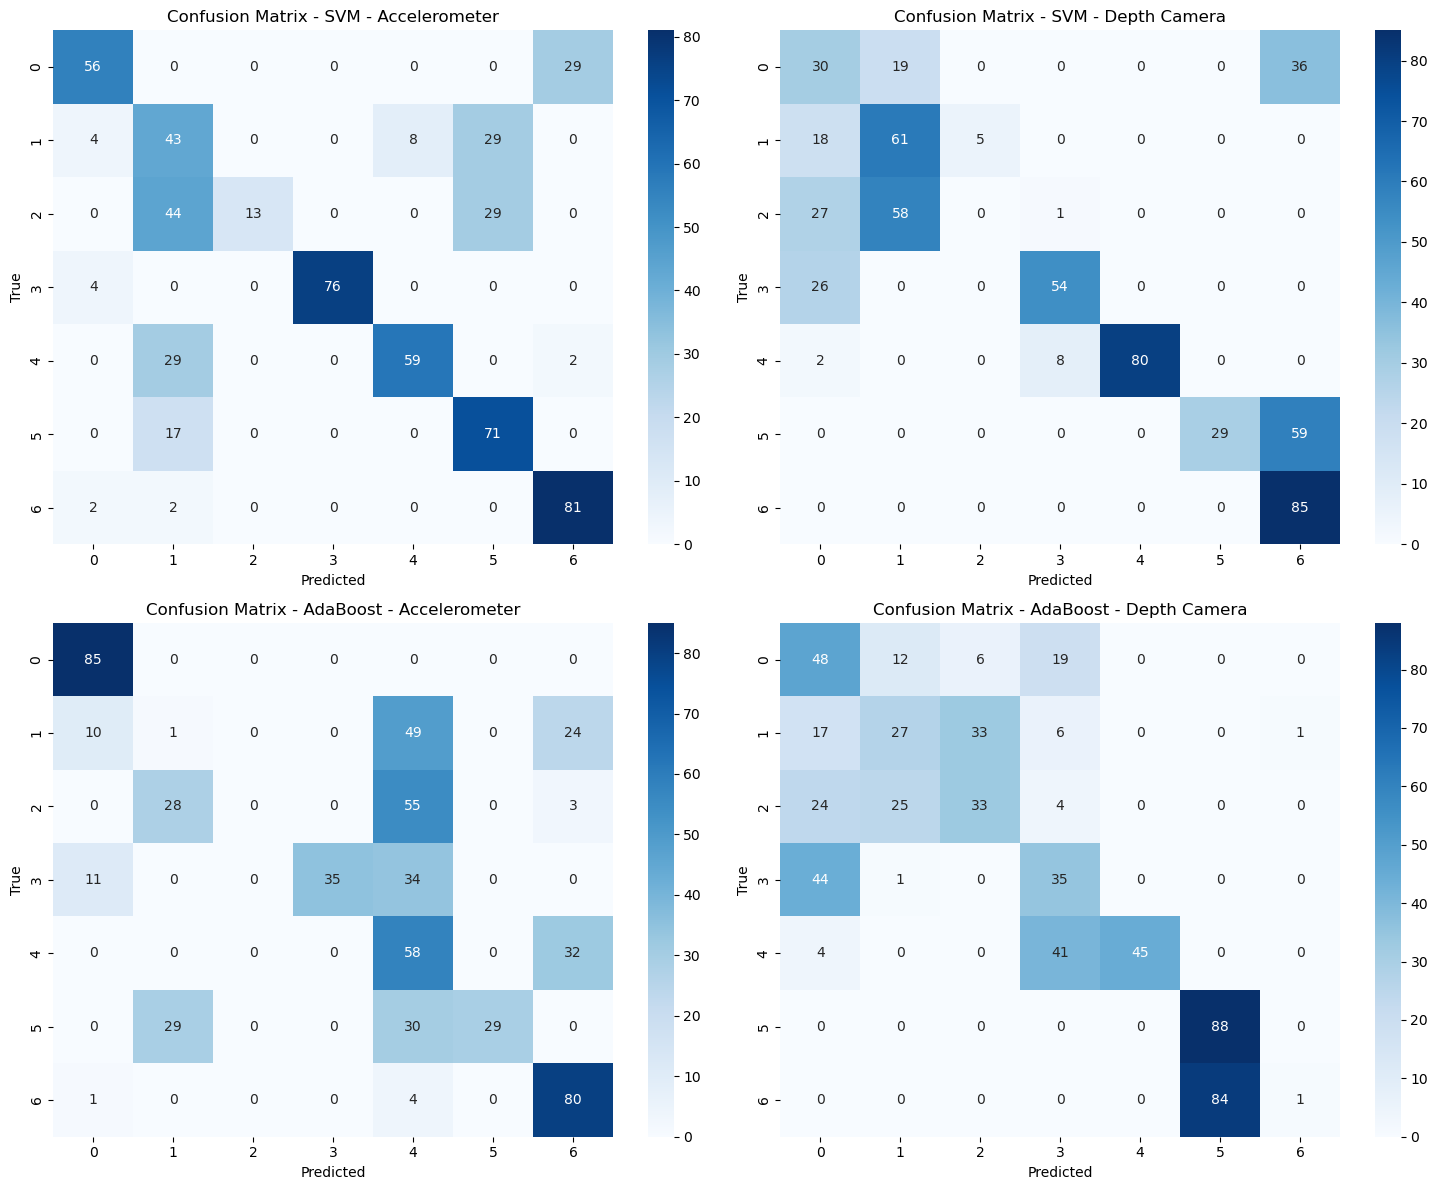

In [89]:
# 4.2

### Your code begins here ###
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_classifier(model, X_test, y_test, model_name, ax):
    """
    Evaluate a classifier and display its performance metrics
    
    Parameters:
    model: trained classifier
    X_test: test features
    y_test: true labels
    model_name: name of the model for display purposes
    ax: Matplotlib Axes object for plotting the heatmap
    """
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report with zero_division parameter
    print(f"\n{model_name} Results:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix on the provided Axes object
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    
    return y_prob


# Dictionary to store probability outputs
prob_outputs = {}

# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Evaluate SVM with accelerometer data
prob_outputs['svm_acc'] = evaluate_classifier(
    trained_models['svm_acc'],
    test_data['acc'],
    test_labels,
    "SVM - Accelerometer",
    axes[0, 0]
)

# Evaluate SVM with depth camera data
prob_outputs['svm_depth'] = evaluate_classifier(
    trained_models['svm_depth'],
    test_data['depth'],
    test_labels,
    "SVM - Depth Camera",
    axes[0, 1]
)

# Evaluate AdaBoost with accelerometer data
prob_outputs['adaboost_acc'] = evaluate_classifier(
    trained_models['adaboost_acc'],
    test_data['acc'],
    test_labels,
    "AdaBoost - Accelerometer",
    axes[1, 0]
)

# Evaluate AdaBoost with depth camera data
prob_outputs['adaboost_depth'] = evaluate_classifier(
    trained_models['adaboost_depth'],
    test_data['depth'],
    test_labels,
    "AdaBoost - Depth Camera",
    axes[1, 1]
)

plt.tight_layout()
plt.show()

# Store the probability outputs and test labels for use in the next task
test_results = {
    'probabilities': prob_outputs,
    'true_labels': test_labels
}


### Your code ends here ###

### Thoughts

The results show that there is overfitting happening in the models because the results were much higher in the trainig data and in the testing data the individual modality models are not performing very good. Actaully worse than what we got in 3.3 where we combined the 2 modalities. 

<a id='task4'></a>
<div class=" alert alert-warning">
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [101]:
# 4.3

### Your code begins here ###
def print_fusion_metrics(classifier1_probs, classifier2_probs, true_labels, combination_name):
    """
    Evaluates and prints metrics for different fusion methods combining two classifiers' probability outputs.
    
    Args:
        classifier1_probs: Probability predictions from first classifier (shape: n_samples x n_classes)
        classifier2_probs: Probability predictions from second classifier (shape: n_samples x n_classes)
        true_labels: Ground truth labels (shape: n_samples)
        combination_name: String describing the classifier combination being evaluated
    """
    # Stack probabilities for vectorized operations
    stacked_probs = np.stack([classifier1_probs, classifier2_probs], axis=1)
    
    # Calculate predictions using different fusion methods
    max_predictions = 1 + np.argmax(np.max(stacked_probs, axis=1), axis=1)
    min_predictions = 1 + np.argmax(np.min(stacked_probs, axis=1), axis=1)
    prod_predictions = 1 + np.argmax(np.prod(stacked_probs, axis=1), axis=1)
    sum_predictions = 1 + np.argmax(np.sum(stacked_probs, axis=1), axis=1)
    
    print(f"\n=== Fusion Results for {combination_name} ===\n")
    
    # Print F1 scores for each fusion method
    print("F1 Macro Scores:")
    print(f"Maximum Rule: {f1_score(true_labels, max_predictions, average='macro'):.4f}")
    print(f"Minimum Rule: {f1_score(true_labels, min_predictions, average='macro'):.4f}")
    print(f"Product Rule: {f1_score(true_labels, prod_predictions, average='macro'):.4f}")
    print(f"Sum Rule:     {f1_score(true_labels, sum_predictions, average='macro'):.4f}\n")
    
    # Print confusion matrices for each fusion method
    # print("Confusion Matrices:")
    # print("\nMaximum Rule:")
    # print(confusion_matrix(true_labels, max_predictions))
    
    # print("\nMinimum Rule:")
    # print(confusion_matrix(true_labels, min_predictions))
    
    # print("\nProduct Rule:")
    # print(confusion_matrix(true_labels, prod_predictions))
    
    # print("\nSum Rule:")
    # print(confusion_matrix(true_labels, sum_predictions))
    print("\n" + "="*50)

# Evaluate all classifier combinations
print_fusion_metrics(
    prob_outputs['adaboost_acc'], 
    prob_outputs['adaboost_depth'], 
    test_labels,
    "AdaBoost (Accelerometer + Depth Camera)"
)

print_fusion_metrics(
    prob_outputs['svm_acc'], 
    prob_outputs['svm_depth'], 
    test_labels,
    "SVM (Accelerometer + Depth Camera)"
)

print_fusion_metrics(
    prob_outputs['svm_acc'], 
    prob_outputs['adaboost_depth'], 
    test_labels,
    "SVM Accelerometer + AdaBoost Depth Camera"
)

print_fusion_metrics(
    prob_outputs['adaboost_acc'], 
    prob_outputs['svm_depth'], 
    test_labels,
    "AdaBoost Accelerometer + SVM Depth Camera"
)
### Your code ends here ###


=== Fusion Results for AdaBoost (Accelerometer + Depth Camera) ===

F1 Macro Scores:
Maximum Rule: 0.4776
Minimum Rule: 0.7653
Product Rule: 0.7517
Sum Rule:     0.7517



=== Fusion Results for SVM (Accelerometer + Depth Camera) ===

F1 Macro Scores:
Maximum Rule: 0.6169
Minimum Rule: 0.6633
Product Rule: 0.6504
Sum Rule:     0.6269



=== Fusion Results for SVM Accelerometer + AdaBoost Depth Camera ===

F1 Macro Scores:
Maximum Rule: 0.6428
Minimum Rule: 0.6613
Product Rule: 0.6462
Sum Rule:     0.6428



=== Fusion Results for AdaBoost Accelerometer + SVM Depth Camera ===

F1 Macro Scores:
Maximum Rule: 0.5212
Minimum Rule: 0.6137
Product Rule: 0.5245
Sum Rule:     0.5228





### Reflection

The results show that the Minimum Rule consistently seems to perform better than other fusion strategies across all combinations, achieving the highest F1 Macro scores for AdaBoost (0.7653), SVM (0.6633), and hybrid models (SVM Accelerometer + AdaBoost Depth Camera: 0.6613). 


This highlights its effectiveness in leveraging complementary predictions between classifiers and modalities, while other rules like Maximum, Sum, and Product performed less reliably.

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br>
<br>
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br>
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best parameters for SVM - Accelerometer:
{'C': 100.0, 'gamma': 0.75}
Best cross-validation score: 0.8334
Fitting 10 folds for each of 20 candidates, totalling 200 fits

Best parameters for AdaBoost - Accelerometer:
{'learning_rate': 0.75, 'n_estimators': 500}
Best cross-validation score: 0.4024
Fitting 10 folds for each of 24 candidates, totalling 240 fits

Best parameters for SVM - Depth Camera:
{'C': 10.0, 'gamma': 0.1}
Best cross-validation score: 0.9232
Fitting 10 folds for each of 20 candidates, totalling 200 fits

Best parameters for AdaBoost - Depth Camera:
{'learning_rate': 1.0, 'n_estimators': 1000}
Best cross-validation score: 0.7118

SVM - Accelerometer Results:

Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       226
           2       0.89      0.86      0.88       212
           3       0.93      0.77      0.84       179
           4 

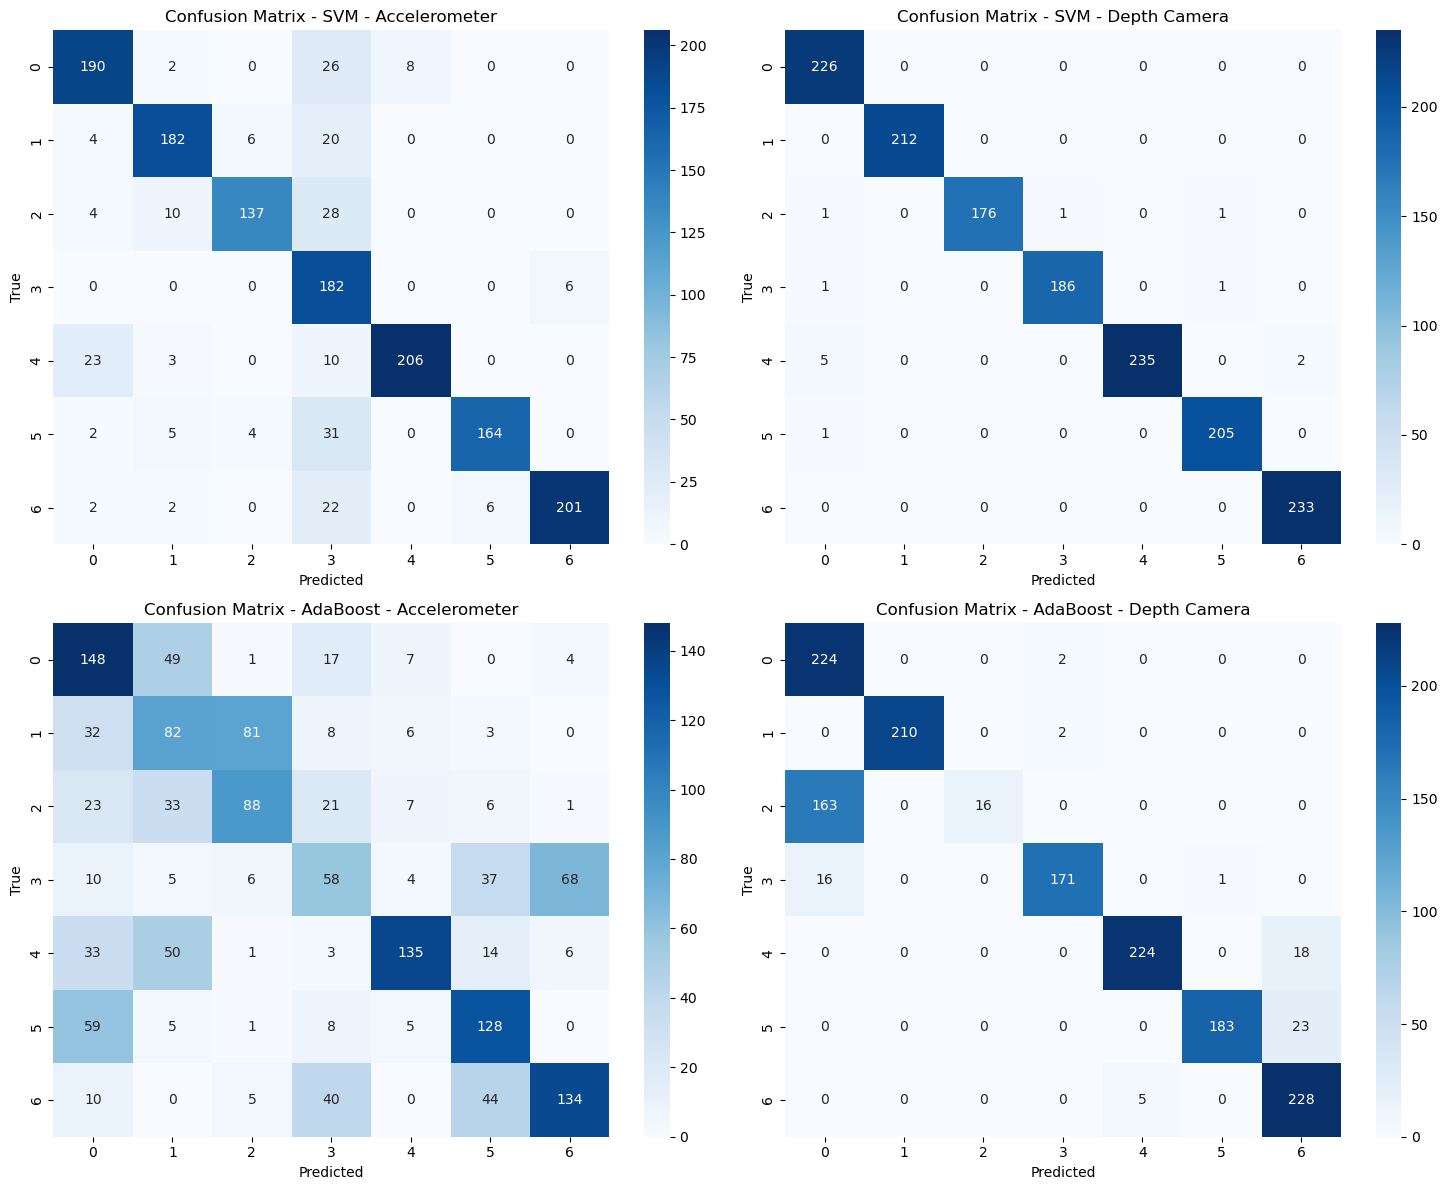

In [139]:
# 5.1

### Your code begins here ###
def split_sequence_data(df, train_ratio=0.25):
    """
    Split each sequence into training and testing sets.
    """
    train_sequences = []
    test_sequences = []
    
    # Group by unique combinations of subject_id, exercise_id, and trial
    for (subject, exercise, trial), group in df.groupby(['subject_id', 'exercise_id', 'trial']):
        # For each sequence in df['df'], split it into train and test
        for _, row in group.iterrows():
            sequence = row['df']
            split_idx = int(len(sequence) * train_ratio)
            
            # Create new row for training data
            train_row = row.copy()
            train_row['df'] = sequence.iloc[:split_idx].copy()
            train_sequences.append(train_row)
            
            # Create new row for testing data
            test_row = row.copy()
            test_row['df'] = sequence.iloc[split_idx:].copy()
            test_sequences.append(test_row)
    
    return pd.DataFrame(train_sequences), pd.DataFrame(test_sequences)

# Process accelerometer data first
def preprocess_accel_data(data): 
    """
    Preprocess accelerometer data by resampling to 125 points and extracting features.
    Returns data in shape (n_samples, 375) where 375 = 125 timesteps * 3 axes
    """
    processed_data = []
    for row in data['df']:
        # Resample to 125 timesteps
        resampled = resample(row[['acc_0', 'acc_1', 'acc_2']].values, 125, axis=0)
        # Flatten the array to 1D (375 features)
        flattened = resampled.flatten()
        processed_data.append(flattened)
    return np.array(processed_data)

def preprocess_depth_data(data):
    """
    Preprocess depth camera data by flattening each frame.
    Returns data in shape (n_samples, 192) where 192 = 12 * 16 pixels
    """
    processed_data = []
    for row in data['df']:
        # Get depth values (excluding time column) and flatten first frame
        depth_values = row.iloc[0, 1:].to_numpy()  # Take only first frame
        processed_data.append(depth_values)
    return np.array(processed_data)


def preprocess_accel_data_test(data): 
    """
    Preprocess accelerometer test data (last 75% of sequence)
    
    Parameters:
    data (pd.DataFrame): DataFrame containing acceleration data with 'df' column
    
    Returns:
    np.ndarray: Processed data of shape (n_samples, 375)
    """
    processed_data = []
    for row in data['df']:
        # Calculate 25% split point
        split_idx = int(len(row) * 0.25)
        # Take last 75% of sequence
        test_sequence = row.iloc[split_idx:]
        # Resample to 125 timesteps
        resampled = resample(test_sequence[['acc_0', 'acc_1', 'acc_2']].values, 125, axis=0)
        # Flatten the array to 1D (375 features)
        flattened = resampled.flatten()
        processed_data.append(flattened)
    return np.array(processed_data)

def preprocess_depth_data_test(data):
    """
    Preprocess depth camera test data (last 75% of sequence)
    
    Parameters:
    data (pd.DataFrame): DataFrame containing depth camera data with 'df' column
    
    Returns:
    np.ndarray: Processed data of shape (n_samples, 192)
    """
    processed_data = []
    for row in data['df']:
        # Calculate 25% split point
        split_idx = int(len(row) * 0.25)
        # Take last 75% of sequence and first frame
        test_sequence = row.iloc[split_idx:]
        # Get depth values (excluding time column) from first frame
        depth_values = test_sequence.iloc[0, 1:].to_numpy()
        processed_data.append(depth_values)
    return np.array(processed_data)

# Split and preprocess data
train_accel_split, test_accel_split = split_sequence_data(train_accel)
train_depth_split, test_depth_split = split_sequence_data(train_depth)

# Preprocess the split data
# I'm shaping the test part of data into 125 samples as well because the shape needs to be same
# just taking the 
train_accel_processed = preprocess_accel_data(train_accel_split)
test_accel_processed = preprocess_accel_data_test(test_accel_split)
train_depth_processed = preprocess_depth_data(train_depth_split)
test_depth_processed = preprocess_depth_data_test(test_depth_split)

# Normalize the processed data
scaler_acc = MinMaxScaler()
train_accel_normalized = scaler_acc.fit_transform(train_accel_processed)
test_accel_normalized = scaler_acc.transform(test_accel_processed)

scaler_depth = MinMaxScaler()
train_depth_normalized = scaler_depth.fit_transform(train_depth_processed)
test_depth_normalized = scaler_depth.transform(test_depth_processed)
# Get labels
train_labels = train_accel_split['subject_id'].astype(int)
test_labels = test_accel_split['subject_id'].astype(int)

# Initialize and train models
svm_acc = SVC(kernel='rbf', random_state=0, probability=True)
svm_depth = SVC(kernel='rbf', random_state=0, probability=True)
adaboost_acc = AdaBoostClassifier(random_state=0, algorithm='SAMME')
adaboost_depth = AdaBoostClassifier(random_state=0, algorithm='SAMME')

# Train models using grid search
svm_acc_best = train_with_grid_search(
    train_accel_normalized, 
    train_labels,
    svm_acc,
    svm_param_grid,
    "SVM - Accelerometer"
)

adaboost_acc_best = train_with_grid_search(
    train_accel_normalized,
    train_labels,
    adaboost_acc,
    adaboost_param_grid,
    "AdaBoost - Accelerometer"
)

svm_depth_best = train_with_grid_search(
    train_depth_normalized,
    train_labels,
    svm_depth,
    svm_param_grid,
    "SVM - Depth Camera"
)

adaboost_depth_best = train_with_grid_search(
    train_depth_normalized,
    train_labels,
    adaboost_depth,
    adaboost_param_grid,
    "AdaBoost - Depth Camera"
)

# Store trained models
trained_models = {
    'svm_acc': svm_acc_best,
    'svm_depth': svm_depth_best,
    'adaboost_acc': adaboost_acc_best,
    'adaboost_depth': adaboost_depth_best
}

# print(train_accel)
# print(train_depth['df'].iloc[0])


### Your code ends here ###


SVM - Accelerometer (Shuffled) Results:

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.93      0.92       226
           2       0.89      0.93      0.91       212
           3       0.95      0.82      0.88       179
           4       0.75      0.96      0.85       188
           5       0.96      0.93      0.95       242
           6       0.95      0.89      0.92       206
           7       0.97      0.88      0.92       233

    accuracy                           0.91      1486
   macro avg       0.91      0.91      0.91      1486
weighted avg       0.92      0.91      0.91      1486


SVM - Depth Camera (Shuffled) Results:

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       212
           3       1.00      0.99      1.00       179
           4       0.99      1.00      1.00       188
   

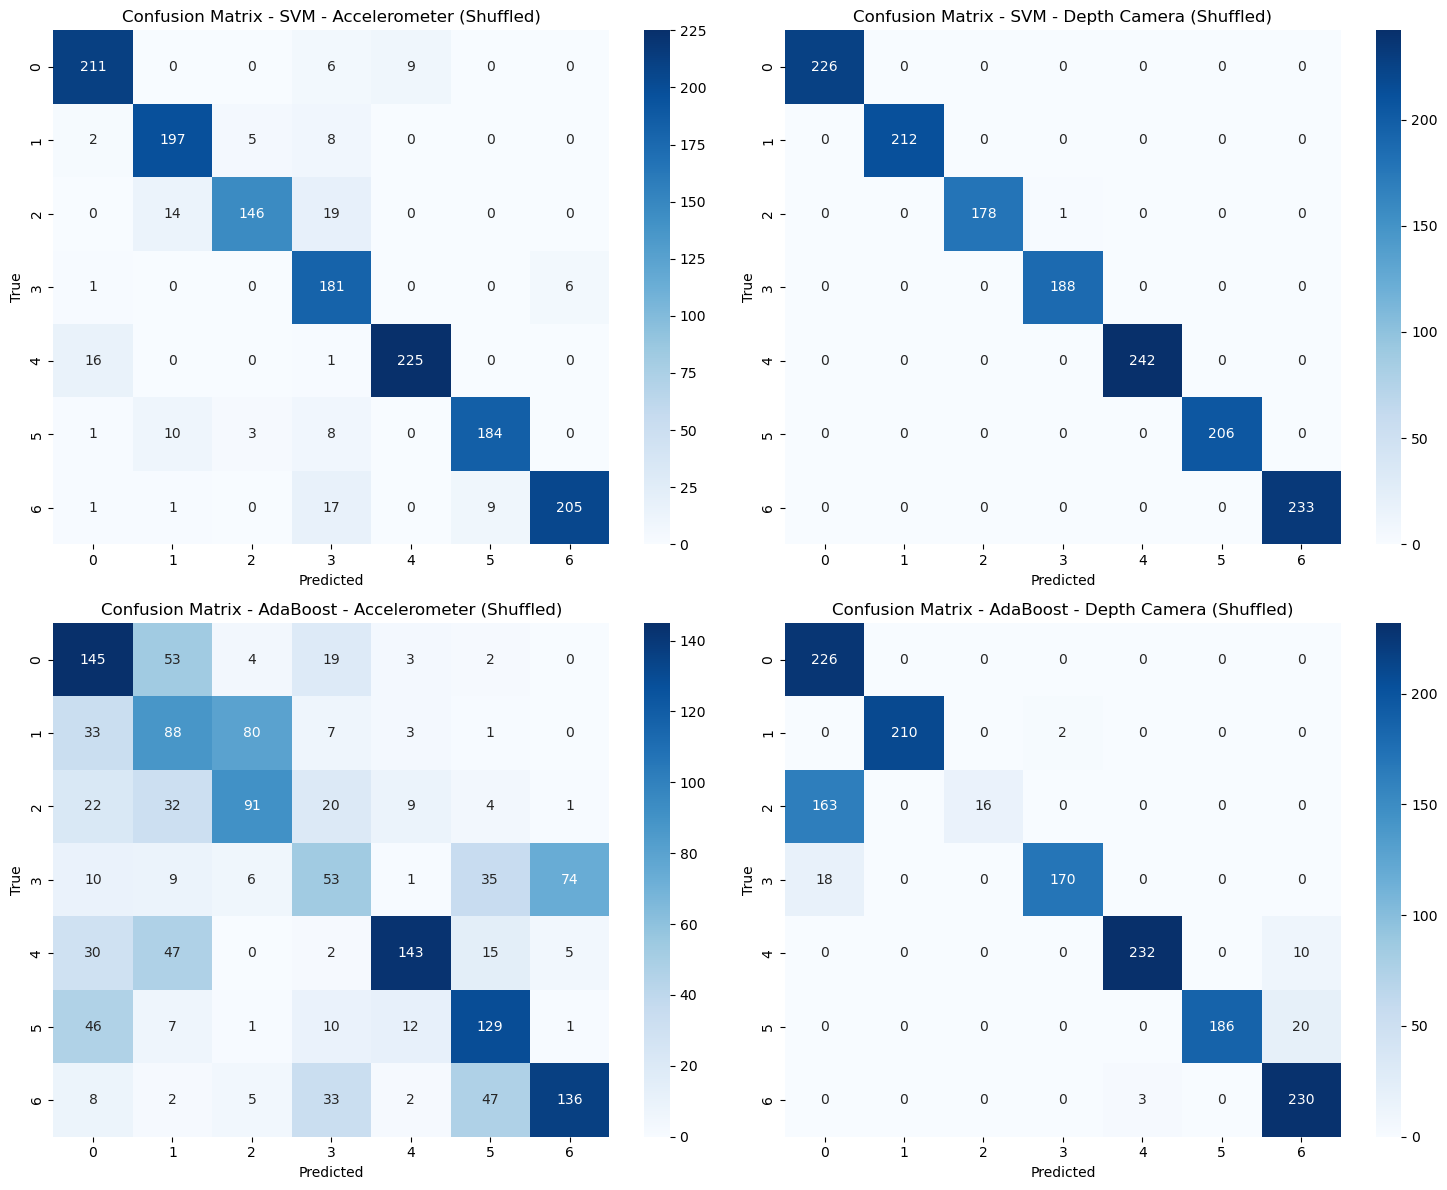

In [151]:
# 5.1 continued here because I can't train the models again and again it takes time 


def preprocess_accel_data_test(data): 
    """
    Preprocess accelerometer test data (last 75% of sequence)
    
    Parameters:
    data (pd.DataFrame): DataFrame containing acceleration data with 'df' column
    
    Returns:
    np.ndarray: Processed data of shape (n_samples, 375)
    """
    processed_data = []
    for row in data['df']:
        # Calculate 25% split point
        split_idx = int(len(row) * 0.25)
        # Take last 75% of sequence
        test_sequence = row.iloc[split_idx:]
        # Resample to 125 timesteps
        resampled = resample(test_sequence[['acc_0', 'acc_1', 'acc_2']].values, 125, axis=0)
        # Flatten the array to 1D (375 features)
        flattened = resampled.flatten()
        processed_data.append(flattened)
    return np.array(processed_data)

def preprocess_depth_data_test(data):
    """
    Preprocess depth camera test data (last 75% of sequence)
    
    Parameters:
    data (pd.DataFrame): DataFrame containing depth camera data with 'df' column
    
    Returns:
    np.ndarray: Processed data of shape (n_samples, 192)
    """
    processed_data = []
    for row in data['df']:
        # Calculate 25% split point
        split_idx = int(len(row) * 0.25)
        # Take last 75% of sequence and first frame
        test_sequence = row.iloc[split_idx:]
        # Get depth values (excluding time column) from first frame
        depth_values = test_sequence.iloc[0, 1:].to_numpy()
        processed_data.append(depth_values)
    return np.array(processed_data)



def evaluate_classifier(model, X_test, y_test, model_name, ax):
    """
    Evaluate a classifier and display its performance metrics
    
    Parameters:
    model: trained classifier
    X_test: test features
    y_test: true labels
    model_name: name of the model for display purposes
    ax: Matplotlib Axes object for plotting the heatmap
    """
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report with zero_division parameter
    print(f"\n{model_name} Results:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix on the provided Axes object
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    
    return y_prob



def shuffle_test_data(test_accel_data, test_depth_data, test_labels):
    """
    Shuffle test data while maintaining correspondence between features and labels.
    
    Parameters:
    test_accel_data: numpy array of accelerometer features
    test_depth_data: numpy array of depth camera features
    test_labels: numpy array of labels
    
    Returns:
    tuple: (shuffled_accel_data, shuffled_depth_data, shuffled_labels)
    """
    # Generate random permutation indices
    shuffle_idx = np.random.permutation(len(test_labels))
    
    # Shuffle all arrays using the same permutation
    shuffled_accel = test_accel_data[shuffle_idx]
    shuffled_depth = test_depth_data[shuffle_idx]
    shuffled_labels = test_labels.iloc[shuffle_idx] if isinstance(test_labels, pd.Series) else test_labels[shuffle_idx]
    
    return shuffled_accel, shuffled_depth, shuffled_labels


# just process the test data here because don't need to train the models again
test_accel_processed = preprocess_accel_data_test(test_accel_split)
test_depth_processed = preprocess_depth_data_test(test_depth_split)

# normalize the test data
test_accel_normalized = scaler_acc.transform(test_accel_processed)
test_depth_normalized = scaler_depth.transform(test_depth_processed)



# shuffle the test data
shuffled_accel, shuffled_depth, shuffled_labels = shuffle_test_data(
    test_accel_normalized,
    test_depth_normalized,
    test_labels
)




# Evaluate models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
prob_outputs = {}

# Evaluate each model with shuffled data
prob_outputs['svm_acc'] = evaluate_classifier(
    trained_models['svm_acc'],
    shuffled_accel,
    shuffled_labels,
    "SVM - Accelerometer (Shuffled)",
    axes[0, 0]
)

prob_outputs['svm_depth'] = evaluate_classifier(
    trained_models['svm_depth'],
    shuffled_depth,
    shuffled_labels,
    "SVM - Depth Camera (Shuffled)",
    axes[0, 1]
)

prob_outputs['adaboost_acc'] = evaluate_classifier(
    trained_models['adaboost_acc'],
    shuffled_accel,
    shuffled_labels,
    "AdaBoost - Accelerometer (Shuffled)",
    axes[1, 0]
)

prob_outputs['adaboost_depth'] = evaluate_classifier(
    trained_models['adaboost_depth'],
    shuffled_depth,
    shuffled_labels,
    "AdaBoost - Depth Camera (Shuffled)",
    axes[1, 1]
)

plt.tight_layout()
plt.show()

SVM outperformed AdaBoost on both accelerometer and depth camera data. For accelerometer data, SVM achieved 85% accuracy, while AdaBoost struggled with 52%. On depth camera data, SVM excelled with 99% accuracy, compared to AdaBoost’s 85%, which suffered from poor recall for class 3. Overall, SVM showed consistently better performance, particularly with depth camera features.

I tried out the models without dimensionality reduction and the results are pretty good. If I had more time I would try to implement the models with dimensionality reduction and see if the results improve. Even if the results don't improve, it would reduce the computational time and make the models faster.


Ran it again and SVM Depth gave: 0.99. Working pretty good. But then there's also the problem of the labels being in the same order for training and testing data. What if we shuffle the data? Would it still stay the same?

So I shuffled the data and ran it again and the results are again equally good. So My theory was wrong.



First results and analysis here is when I was taking the first 25% of the testing data and wasting the rest of it. I was using the same normalization function for both trainining and testing, which was taking the first 25% of each. After rewriting the processing functions for the testing data to utilize the last 75% of the data, the results improved drastically.

So: 

Increasing the testing data size improved SVM's performance, particularly for accelerometer data, raising accuracy from 85% to 91%, and maintained excellent results for depth camera data at 100%. Are we doing something wrong here? It's too good to be true. 

AdaBoost's performance remained largely unchanged, with marginal improvements but still significantly lower accuracy, especially on accelerometer data.

<a id='task5'></a>
<div class=" alert alert-warning">

<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

Using device: cpu
Original unique labels: [1 2 3 4 5 6 7]
Adjusted unique labels: [0 1 2 3 4 5 6]
Number of classes: 7
Starting training...
Epoch [10/500], Loss: 0.6627, Accuracy: 73.55%
Epoch [20/500], Loss: 0.3738, Accuracy: 86.88%
Epoch [30/500], Loss: 0.2576, Accuracy: 90.44%
Epoch [40/500], Loss: 0.2015, Accuracy: 92.46%
Epoch [50/500], Loss: 0.1447, Accuracy: 95.15%
Epoch [60/500], Loss: 0.1183, Accuracy: 95.83%
Epoch [70/500], Loss: 0.1330, Accuracy: 95.09%
Epoch [80/500], Loss: 0.0921, Accuracy: 96.90%
Epoch [90/500], Loss: 0.1675, Accuracy: 94.55%
Epoch [100/500], Loss: 0.0955, Accuracy: 96.90%
Epoch [110/500], Loss: 0.0955, Accuracy: 96.43%
Epoch [120/500], Loss: 0.1113, Accuracy: 95.69%
Epoch [130/500], Loss: 0.0831, Accuracy: 97.17%
Epoch [140/500], Loss: 0.0700, Accuracy: 97.17%
Epoch [150/500], Loss: 0.0537, Accuracy: 98.25%
Epoch [160/500], Loss: 0.0820, Accuracy: 96.84%
Epoch [170/500], Loss: 0.0779, Accuracy: 97.04%
Epoch [180/500], Loss: 0.0728, Accuracy: 97.64%
Epoch

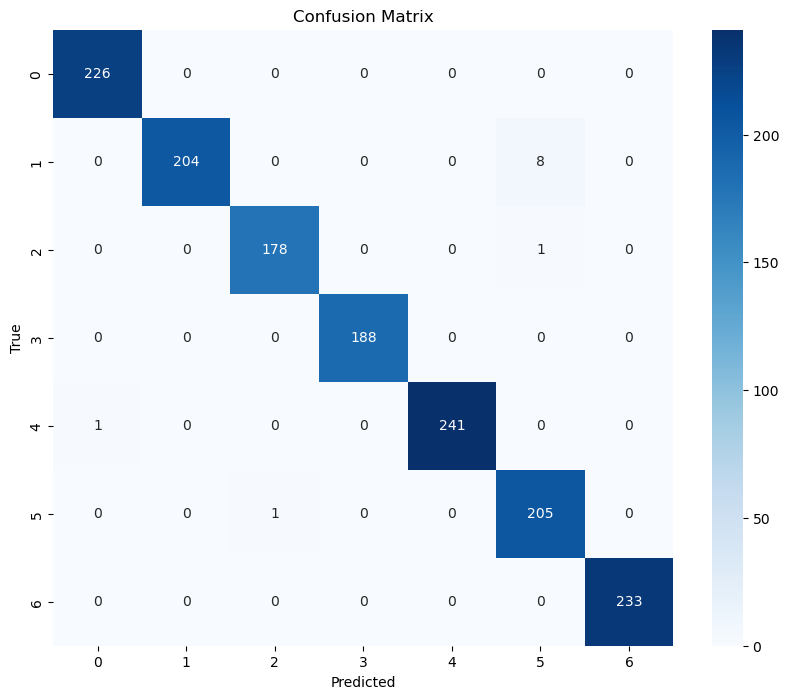

In [157]:
# 5.2

### Your code begins here ###
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def adjust_labels(labels):
    """
    Adjust labels to be 0-based and continuous
    """
    # Get unique labels and create a mapping
    unique_labels = np.unique(labels)
    label_map = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
    
    # Convert labels using the mapping
    return np.array([label_map[label] for label in labels])


# Custom Dataset class to handle both modalities
class BiModalDataset(Dataset):
    def __init__(self, accel_data, depth_data, labels):
        self.accel_data = torch.FloatTensor(accel_data)
        self.depth_data = torch.FloatTensor(depth_data)
        self.labels = torch.LongTensor(labels.astype(int))
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return {
            'accel': self.accel_data[idx],
            'depth': self.depth_data[idx],
            'label': self.labels[idx]
        }

# Neural Network Architecture
class BiModalNN(nn.Module):
    def __init__(self, accel_input_size, depth_input_size, num_classes):
        super(BiModalNN, self).__init__()
        
        # Accelerometer branch
        self.accel_network = nn.Sequential(
            nn.Linear(accel_input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Depth camera branch
        self.depth_network = nn.Sequential(
            nn.Linear(depth_input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Combined layers
        self.combined_network = nn.Sequential(
            nn.Linear(256, 128),  # 128 + 128 = 256 from both branches
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
        
    def forward(self, accel_x, depth_x):
        accel_features = self.accel_network(accel_x)
        depth_features = self.depth_network(depth_x)
        
        # Concatenate features from both modalities
        combined = torch.cat((accel_features, depth_features), dim=1)
        return self.combined_network(combined)

# Training function
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=500):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for batch in train_loader:
            accel_data = batch['accel'].to(device)
            depth_data = batch['depth'].to(device)
            labels = batch['label'].to(device)
            
            optimizer.zero_grad()
            outputs = model(accel_data, depth_data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, '
                  f'Accuracy: {100 * correct/total:.2f}%')

# Evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in test_loader:
            accel_data = batch['accel'].to(device)
            depth_data = batch['depth'].to(device)
            labels = batch['label'].to(device)
            
            outputs = model(accel_data, depth_data)
            _, predicted = torch.max(outputs.data, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))
    
    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    return all_preds, all_labels

def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Adjust labels to be 0-based
    adjusted_train_labels = adjust_labels(train_labels)
    adjusted_test_labels = adjust_labels(test_labels)
    
    # Print label information
    print("Original unique labels:", np.unique(train_labels))
    print("Adjusted unique labels:", np.unique(adjusted_train_labels))
    print("Number of classes:", len(np.unique(adjusted_train_labels)))
    
    # Create datasets with adjusted labels
    train_dataset = BiModalDataset(train_accel_normalized, train_depth_normalized, adjusted_train_labels)
    test_dataset = BiModalDataset(test_accel_normalized, test_depth_normalized, adjusted_test_labels)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Initialize model with correct number of classes
    model = BiModalNN(
        accel_input_size=train_accel_normalized.shape[1],
        depth_input_size=train_depth_normalized.shape[1],
        num_classes=len(np.unique(adjusted_train_labels))
    ).to(device)
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train the model
    print("Starting training...")
    train_model(model, train_loader, criterion, optimizer, device)
    
    # Evaluate the model
    print("\nEvaluating model...")
    predictions, true_labels = evaluate_model(model, test_loader, device)
    
    return model, predictions, true_labels

# Run the training and evaluation
if __name__ == "__main__":
    model, predictions, true_labels = main()





### Your code ends here ###

We decided to go for a simple neural network with two branches: one processes accelerometer data, and the other processes depth camera data. Each branch extracts features through dense layers with ReLU activations and dropout for regularization, then combines these features in fully connected layers for final classification. This structure leverages modality-specific patterns while integrating complementary information, enhancing its ability to handle multi-modal data effectively. A special thanks to the Deep Learning course we took. 

The data was pretty simple, otherwise we were thinking of trying out resnet 18, vgg16 and other big models and try transfer learning on the training data and test out their results. But we're pretty happy with the results of this simple neural network. 

We were able to get 0.98-0.99 F-1 score for the model, which is pretty good, because we only ran it for 500 epochs. If we had more time, we would have run it for more epochs and see if the results improve. But it's pretty good for now.